<h1> Amazon Apparel Recommendations </h1>



### [5.1] Missing data for various features.

####  Basic stats for the feature: product_type_name

In [4]:
#import all the necessary packages.

from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
#import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [0]:
# We have total 72 unique type of product_type_names
print(data['product_type_name'].describe())

# 91.62% (167794/183138) of the products are shirts,


count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


In [0]:
# names of different product types
print(data['product_type_name'].unique())

['SHIRT' 'SWEATER' 'APPAREL' 'OUTDOOR_RECREATION_PRODUCT'
 'BOOKS_1973_AND_LATER' 'PANTS' 'HAT' 'SPORTING_GOODS' 'DRESS' 'UNDERWEAR'
 'SKIRT' 'OUTERWEAR' 'BRA' 'ACCESSORY' 'ART_SUPPLIES' 'SLEEPWEAR'
 'ORCA_SHIRT' 'HANDBAG' 'PET_SUPPLIES' 'SHOES' 'KITCHEN' 'ADULT_COSTUME'
 'HOME_BED_AND_BATH' 'MISC_OTHER' 'BLAZER' 'HEALTH_PERSONAL_CARE'
 'TOYS_AND_GAMES' 'SWIMWEAR' 'CONSUMER_ELECTRONICS' 'SHORTS' 'HOME'
 'AUTO_PART' 'OFFICE_PRODUCTS' 'ETHNIC_WEAR' 'BEAUTY'
 'INSTRUMENT_PARTS_AND_ACCESSORIES' 'POWERSPORTS_PROTECTIVE_GEAR' 'SHIRTS'
 'ABIS_APPAREL' 'AUTO_ACCESSORY' 'NONAPPARELMISC' 'TOOLS' 'BABY_PRODUCT'
 'SOCKSHOSIERY' 'POWERSPORTS_RIDING_SHIRT' 'EYEWEAR' 'SUIT'
 'OUTDOOR_LIVING' 'POWERSPORTS_RIDING_JACKET' 'HARDWARE' 'SAFETY_SUPPLY'
 'ABIS_DVD' 'VIDEO_DVD' 'GOLF_CLUB' 'MUSIC_POPULAR_VINYL'
 'HOME_FURNITURE_AND_DECOR' 'TABLET_COMPUTER' 'GUILD_ACCESSORIES'
 'ABIS_SPORTS' 'ART_AND_CRAFT_SUPPLY' 'BAG' 'MECHANICAL_COMPONENTS'
 'SOUND_AND_RECORDING_EQUIPMENT' 'COMPUTER_COMPONENT' 'JEWELRY'
 'B

In [0]:
# find the 10 most frequent product_type_names.
product_type_count = Counter(list(data['product_type_name']))
product_type_count.most_common(10)

[('SHIRT', 167794),
 ('APPAREL', 3549),
 ('BOOKS_1973_AND_LATER', 3336),
 ('DRESS', 1584),
 ('SPORTING_GOODS', 1281),
 ('SWEATER', 837),
 ('OUTERWEAR', 796),
 ('OUTDOOR_RECREATION_PRODUCT', 729),
 ('ACCESSORY', 636),
 ('UNDERWEAR', 425)]

####  Basic stats for the feature: brand

In [0]:
# there are 10577 unique brands
print(data['brand'].describe())

# 183138 - 182987 = 151 missing values.

count     182987
unique     10577
top         Zago
freq         223
Name: brand, dtype: object


In [0]:
brand_count = Counter(list(data['brand']))
brand_count.most_common(10)

[('Zago', 223),
 ('XQS', 222),
 ('Yayun', 215),
 ('YUNY', 198),
 ('XiaoTianXin-women clothes', 193),
 ('Generic', 192),
 ('Boohoo', 190),
 ('Alion', 188),
 ('Abetteric', 187),
 ('TheMogan', 187)]

####  Basic stats for the feature: color

In [0]:

print(data['color'].describe())


# we have 7380 unique colors
# 7.2% of products are black in color
# 64956 of 183138 products have brand information. That's approx 35.4%.

count     64956
unique     7380
top       Black
freq      13207
Name: color, dtype: object


In [0]:
color_count = Counter(list(data['color']))
color_count.most_common(10)

[(None, 118182),
 ('Black', 13207),
 ('White', 8616),
 ('Blue', 3570),
 ('Red', 2289),
 ('Pink', 1842),
 ('Grey', 1499),
 ('*', 1388),
 ('Green', 1258),
 ('Multi', 1203)]

####  Basic stats for the feature: formatted_price

In [0]:
 
print(data['formatted_price'].describe())

# Only 28,395 (15.5% of whole data) products with price information

count      28395
unique      3135
top       $19.99
freq         945
Name: formatted_price, dtype: object


In [0]:
price_count = Counter(list(data['formatted_price']))
price_count.most_common(10)

[(None, 154743),
 ('$19.99', 945),
 ('$9.99', 749),
 ('$9.50', 601),
 ('$14.99', 472),
 ('$7.50', 463),
 ('$24.99', 414),
 ('$29.99', 370),
 ('$8.99', 343),
 ('$9.01', 336)]

#### Basic stats for the feature: title


In [0]:
print(data['title'].describe())

# All of the products have a title. 
# Titles are fairly descriptive of what the product is. 
# We use titles extensively in this workshop 
# as they are short and informative.


count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                                                     77
Name: title, dtype: object


In [0]:
data.to_pickle('pickels/180k_apparel_data')

   We save data files at every major step in our processing in "pickle" files. If you are stuck anywhere (or) if some code takes too long to run on your laptop, you may use the pickle files we give you to speed things up.

In [0]:
# consider products which have price information
# data['formatted_price'].isnull() => gives the information 
#about the dataframe row's which have null values price == None|Null
data = data.loc[~data['formatted_price'].isnull()]
print('Number of data points After eliminating price=NULL :', data.shape[0])

Number of data points After eliminating price=NULL : 28395


In [0]:
# consider products which have color information
# data['color'].isnull() => gives the information about the dataframe row's which have null values price == None|Null
data =data.loc[~data['color'].isnull()]
print('Number of data points After eliminating color=NULL :', data.shape[0])

Number of data points After eliminating color=NULL : 28385


#### We brought down the number of data points from 183K  to 28K.

We are processing only 28K points so that most of the workshop participants can run this code on thier laptops in a reasonable amount of time. <br> 

For those of you who have powerful computers and some time to spare, you are recommended to use all of the 183K images.


In [0]:
data.to_pickle('pickels/28k_apparel_data')

In [0]:
# You can download all these 28k images using this code below.
# You do NOT need to run this code and hence it is commented.


'''
from PIL import Image
import requests
from io import BytesIO

for index, row in images.iterrows():
        url = row['large_image_url']
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        img.save('images/28k_images/'+row['asin']+'.jpeg')


'''

"\nfrom PIL import Image\nimport requests\nfrom io import BytesIO\n\nfor index, row in images.iterrows():\n        url = row['large_image_url']\n        response = requests.get(url)\n        img = Image.open(BytesIO(response.content))\n        img.save('workshop/images/28k_images/'+row['asin']+'.jpeg')\n\n\n"

### [5.2] Remove near duplicate items

#### [5.2.1] Understand about duplicates.

In [0]:
# read data from pickle file from previous stage
data = pd.read_pickle('pickels/28k_apparel_data')

# find number of products that have duplicate titles.
print(sum(data.duplicated('title')))
# we have 2325 products which have same title but different color


2325


#### These shirts are exactly same except in size (S, M,L,XL)

<table>
<tr> 
<td><img src="dedupe/B00AQ4GMCK.jpeg",width=100,height=100> :B00AQ4GMCK</td>
<td><img src="dedupe/B00AQ4GMTS.jpeg",width=100,height=100> :B00AQ4GMTS</td>
</tr>
<tr> 
<td><img src="dedupe/B00AQ4GMLQ.jpeg",width=100,height=100> :B00AQ4GMLQ</td>
<td><img src="dedupe/B00AQ4GN3I.jpeg",width=100,height=100> :B00AQ4GN3I</td>
</tr>
</table>

#### These shirts exactly same except  in color

<table>
<tr> 
<td><img src="dedupe/B00G278GZ6.jpeg",width=100,height=100> :B00G278GZ6</td>
<td><img src="dedupe/B00G278W6O.jpeg",width=100,height=100> :B00G278W6O</td>
</tr>
<tr> 
<td><img src="dedupe/B00G278Z2A.jpeg",width=100,height=100> :B00G278Z2A</td>
<td><img src="dedupe/B00G2786X8.jpeg",width=100,height=100> :B00G2786X8</td>
</tr>
</table>

#### In our data there are many duplicate products like the above examples, we need to de-dupe them for better results.


#### [5.2.2] Remove duplicates : Part 1

In [0]:
# read data from pickle file from previous stage
data = pd.read_pickle('pickels/28k_apparel_data')

In [0]:
data.head()

asin                        brand              color  \
4   B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
6   B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
11  B001LOUGE4                 Fitness Etc.              Black   
15  B003BSRPB0                  FeatherLite              White   
21  B014ICEDNA                        FNC7C             Purple   

                                     medium_image_url product_type_name  \
4   https://images-na.ssl-images-amazon.com/images...             SHIRT   
6   https://images-na.ssl-images-amazon.com/images...             SHIRT   
11  https://images-na.ssl-images-amazon.com/images...             SHIRT   
15  https://images-na.ssl-images-amazon.com/images...             SHIRT   
21  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                title formatted_price  
4   Featherlite Ladies' Long Sleeve Stain Resistan...          $26.26  
6   Women's Unique 100% Cotton T - Special Olympic...           $9.99  
11             Ladies Cotton Tank 2x1 Ribbed Tank Top          $11.99  
15  FeatherLite Ladies' Moisture Free Mesh Sport S...          $20.54  
21  Supernatural Chibis Sam Dean And Castiel Short...           $7.50

In [0]:
# Remove All products with very few words in title
data_sorted = data[data['title'].apply(lambda x: len(x.split())>4)]
print("After removal of products with short description:", data_sorted.shape[0])

After removal of products with short description: 27949


In [0]:
# Sort the whole data based on title (alphabetical order of title) 
data_sorted.sort_values('title',inplace=True, ascending=False)
data_sorted.head()

asin     brand        color  \
61973   B06Y1KZ2WB    Éclair   Black/Pink   
133820  B010RV33VE  xiaoming         Pink   
81461   B01DDSDLNS  xiaoming        White   
75995   B00X5LYO9Y  xiaoming  Red Anchors   
151570  B00WPJG35K  xiaoming        White   

                                         medium_image_url product_type_name  \
61973   https://images-na.ssl-images-amazon.com/images...             SHIRT   
133820  https://images-na.ssl-images-amazon.com/images...             SHIRT   
81461   https://images-na.ssl-images-amazon.com/images...             SHIRT   
75995   https://images-na.ssl-images-amazon.com/images...             SHIRT   
151570  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                    title formatted_price  
61973   Éclair Women's Printed Thin Strap Blouse Black...          $24.99  
133820  xiaoming Womens Sleeveless Loose Long T-shirts...          $18.19  
81461   xiaoming Women's White Long Sleeve Single Brea...          $21.58  
75995   xiaoming Stripes Tank Patch/Bear Sleeve Anchor...          $15.91  
151570  xiaoming Sleeve Sheer Loose Tassel Kimono Woma...          $14.32

#### Some examples of dupliacte titles that differ only in the last few words.

<pre>
Titles 1:
16. woman's place is in the house and the senate shirts for Womens XXL White
17. woman's place is in the house and the senate shirts for Womens M Grey

Title 2:
25. tokidoki The Queen of Diamonds Women's Shirt X-Large
26. tokidoki The Queen of Diamonds Women's Shirt Small
27. tokidoki The Queen of Diamonds Women's Shirt Large

Title 3:
61. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
62. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
63. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
64. psychedelic colorful Howling Galaxy Wolf T-shirt/Colorful Rainbow Animal Print Head Shirt for woman Neon Wolf t-shirt
</pre>

In [0]:
indices = []
for i,row in data_sorted.iterrows():
    indices.append(i)

In [0]:
import itertools
stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0]
while i < num_data_points and j < num_data_points:
    
    previous_i = i

    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    a = data['title'].loc[indices[i]].split()

    # search for the similar products sequentially 
    j = i+1
    while j < num_data_points:

        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'Small']
        b = data['title'].loc[indices[j]].split()

        # store the maximum length of two strings
        length = max(len(a), len(b))

        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0] == k[1]):
                count += 1

        # if the number of words in which both strings differ are > 2 , we are considering it as those two apperals are different
        # if the number of words in which both strings differ are < 2 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) > 2: # number of words in which both sensences differ
            # if both strings are differ by more than 2 words we include the 1st string index
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])

            # if the comaprision between is between num_data_points, num_data_points-1 strings and they differ in more than 2 words we include both
            if j == num_data_points-1: stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[j]])

            # start searching for similar apperals corresponds 2nd string
            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break

In [0]:
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]

#### We removed  the dupliactes which differ only at the end.

In [0]:
print('Number of data points : ', data.shape[0])

Number of data points :  17593


In [0]:
data.to_pickle('pickels/17k_apperal_data')

#### [5.2.3] Remove duplicates : Part 2

<pre>

In the previous cell, we sorted whole data in alphabetical order of  titles.Then, we removed titles which are adjacent and very similar title

But there are some products whose titles are not adjacent but very similar.

Examples:

Titles-1
86261.  UltraClub Women's Classic Wrinkle-Free Long Sleeve Oxford Shirt, Pink, XX-Large
115042. UltraClub Ladies Classic Wrinkle-Free Long-Sleeve Oxford Light Blue XXL

TItles-2
75004.  EVALY Women's Cool University Of UTAH 3/4 Sleeve Raglan Tee
109225. EVALY Women's Unique University Of UTAH 3/4 Sleeve Raglan Tees
120832. EVALY Women's New University Of UTAH 3/4-Sleeve Raglan Tshirt

</pre>

In [0]:
data = pd.read_pickle('pickels/17k_apperal_data')

In [0]:
# This code snippet takes significant amount of time.
# O(n^2) time.
# Takes about an hour to run on a decent computer.

indices = []
for i,row in data.iterrows():
    indices.append(i)

stage2_dedupe_asins = []
while len(indices)!=0:
    i = indices.pop()
    stage2_dedupe_asins.append(data['asin'].loc[i])
    # consider the first apperal's title
    a = data['title'].loc[i].split()
    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    for j in indices:
        
        b = data['title'].loc[j].split()
        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
        
        length = max(len(a),len(a))
        
        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0]==k[1]):
                count += 1

        # if the number of words in which both strings differ are < 3 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) < 3:
            indices.remove(j)

In [0]:
# from whole previous products we will consider only 
# the products that are found in previous cell 
data = data.loc[data['asin'].isin(stage2_dedupe_asins)]

In [0]:
print('Number of data points after stage two of dedupe: ',data.shape[0])
# from 17k apperals we reduced to 16k apperals

Number of data points after stage two of dedupe:  16042


In [0]:
data.to_pickle('pickels/16k_apperal_data')
# Storing these products in a pickle file
# candidates who wants to download these files instead 
# of 180K they can download and use them from the Google Drive folder.

# [10.2] Keras and Tensorflow to extract features

In [0]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import requests
from PIL import Image
import pandas as pd
import pickle

Using TensorFlow backend.


In [0]:
# https://gist.github.com/fchollet/f35fbc80e066a49d65f1688a7e99f069
# Code reference: https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html



# This code takes 40 minutes to run on a modern GPU (graphics card) 
# like Nvidia  1050.
# GPU (NVidia 1050): 0.175 seconds per image

# This codse takes 160 minutes to run on a high end i7 CPU
# CPU (i7): 0.615 seconds per image.

#Do NOT run this code unless you want to wait a few hours for it to generate output

# each image is converted into 25088 length dense-vector


'''
# dimensions of our images.
img_width, img_height = 224, 224

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'images2/'
nb_train_samples = 16042
epochs = 50
batch_size = 1


def save_bottlebeck_features():
    
    #Function to compute VGG-16 CNN for image feature extraction.
    
    asins = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    
    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

    for i in generator.filenames:
        asins.append(i[2:-5])

    bottleneck_features_train = model.predict_generator(generator, nb_train_samples // batch_size)
    bottleneck_features_train = bottleneck_features_train.reshape((16042,25088))
    
    np.save(open('16k_data_cnn_features.npy', 'wb'), bottleneck_features_train)
    np.save(open('16k_data_cnn_feature_asins.npy', 'wb'), np.array(asins))
    

save_bottlebeck_features()

'''

#Assignment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path='./drive/My Drive/Applied_AI_Workshop_Code_Data/pickels/16k_apperal_data_preprocessed'

In [0]:
data=pd.read_pickle(path)

In [6]:
data.head()

asin                        brand              color  \
4   B004GSI2OS                  FeatherLite  Onyx Black/ Stone   
6   B012YX2ZPI  HX-Kingdom Fashion T-shirts              White   
15  B003BSRPB0                  FeatherLite              White   
27  B014ICEJ1Q                        FNC7C             Purple   
46  B01NACPBG2                 Fifth Degree              Black   

                                     medium_image_url product_type_name  \
4   https://images-na.ssl-images-amazon.com/images...             SHIRT   
6   https://images-na.ssl-images-amazon.com/images...             SHIRT   
15  https://images-na.ssl-images-amazon.com/images...             SHIRT   
27  https://images-na.ssl-images-amazon.com/images...             SHIRT   
46  https://images-na.ssl-images-amazon.com/images...             SHIRT   

                                                title formatted_price  
4   featherlite ladies long sleeve stain resistant...          $26.26  
6   womens unique 100 cotton  special olympics wor...           $9.99  
15  featherlite ladies moisture free mesh sport sh...          $20.54  
27  supernatural chibis sam dean castiel neck tshi...           $7.39  
46  fifth degree womens gold foil graphic tees jun...           $6.95

In [62]:
data[['medium_image_url','title']].iloc[[12566]].index[0]

142055

In [46]:
data.iloc[12566]

asin                                                        B00JXQB5FQ
brand                                                           Si Row
color                                                            Brown
medium_image_url     https://images-na.ssl-images-amazon.com/images...
product_type_name                                       TOYS_AND_GAMES
title                  burnt umber tiger tshirt zebra stripes xl  xxl 
formatted_price                                                 $19.61
Name: 142055, dtype: object

In [0]:
# Utility Functions which we will use through the rest of the workshop.


#Display an image
def display_img(url,ax,fig):
    # we get the url of the apparel and download it
    response = requests.get(url)
    print(url)
    img = Image.open(BytesIO(response.content))
    # we will display it in notebook 
    plt.imshow(img)
  
#plotting code to understand the algorithm's decision.
def plot_heatmap(keys, values, labels, url, text):
        # keys: list of words of recommended title
        # values: len(values) ==  len(keys), values(i) represents the occurence of the word keys(i)
        # labels: len(labels) == len(keys), the values of labels depends on the model we are using
                # if model == 'bag of words': labels(i) = values(i)
                # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
                # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))
        # url : apparel's url

        # we will devide the whole figure into two parts
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        # 1st, ploting heat map that represents the count of commonly ocurred words in title2
        ax = plt.subplot(gs[0])
        # it displays a cell in white color if the word is intersection(lis of words of title1 and list of words of title2), in black if not
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) # set that axis labels as the words of title
        ax.set_title(text) # apparel title
        
        # 2nd, plotting image of the the apparel
        ax = plt.subplot(gs[1])
        # we don't want any grid lines for image and no labels on x-axis and y-axis
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # we call dispaly_img based with paramete url
        display_img(url, ax, fig)
        
        # displays combine figure ( heat map and image together)
        plt.show()
    
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

    # doc_id : index of the title1
    # vec1 : input apparels's vector, it is of a dict type {word:count}
    # vec2 : recommended apparels's vector, it is of a dict type {word:count}
    # url : apparels image url
    # text: title of recomonded apparel (used to keep title of image)
    # model, it can be any of the models, 
        # 1. bag_of_words
        # 2. tfidf
        # 3. idf

    # we find the common words in both titles, because these only words contribute to the distance between two title vec's
    intersection = set(vec1.keys()) & set(vec2.keys()) 

    # we set the values of non intersecting words to zero, this is just to show the difference in heatmap
    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    # for labeling heatmap, keys contains list of all words in title2
    keys = list(vec2.keys())
    #  if ith word in intersection(lis of words of title1 and list of words of title2): values(i)=count of that word in title2 else values(i)=0 
    values = [vec2[x] for x in vec2.keys()]
    
    # labels: len(labels) == len(keys), the values of labels depends on the model we are using
        # if model == 'bag of words': labels(i) = values(i)
        # if model == 'tfidf weighted bag of words':labels(i) = tfidf(keys(i))
        # if model == 'idf weighted bag of words':labels(i) = idf(keys(i))

    if model == 'bag_of_words':
        labels = values
    elif model == 'tfidf':
        labels = []
        for x in vec2.keys():
            # tfidf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # tfidf_title_features[doc_id, index_of_word_in_corpus] will give the tfidf value of word in given document (doc_id)
            if x in  tfidf_title_vectorizer.vocabulary_:
                labels.append(tfidf_title_features[doc_id, tfidf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)
    elif model == 'idf':
        labels = []
        for x in vec2.keys():
            # idf_title_vectorizer.vocabulary_ it contains all the words in the corpus
            # idf_title_features[doc_id, index_of_word_in_corpus] will give the idf value of word in given document (doc_id)
            if x in  idf_title_vectorizer.vocabulary_:
                labels.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[x]])
            else:
                labels.append(0)

    plot_heatmap(keys, values, labels, url, text)


# this function gets a list of wrods along with the frequency of each 
# word given "text"
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    # words stores list of all words in given string, you can try 'words = text.split()' this will also gives same result
    return Counter(words) # Counter counts the occurence of each word in list, it returns dict type object {word1:count}



def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    
    # vector1 = dict{word11:#count, word12:#count, etc.}
    vector1 = text_to_vector(text1)

    # vector1 = dict{word21:#count, word22:#count, etc.}
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

In [0]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

# in this project we are using a pretrained model by google
# its 3.3G file, once you load this into your memory 
# it occupies ~9Gb, so please do this step only if you have >12G of ram
# we will provide a pickle file wich contains a dict , 
# and it contains all our courpus words as keys and  model[word] as values
# To use this code-snippet, download "GoogleNews-vectors-negative300.bin" 
# from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit
# it's 1.9GB in size.

'''
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
'''

#if you do NOT have RAM >= 12GB, use the code below.
with open('./drive/My Drive/Applied_AI_Workshop_Code_Data/word2vec_model', 'rb') as handle:
    model = pickle.load(handle)


In [0]:
# Utility functions

def get_word_vec(sentence, doc_id, m_name):
    # sentence : title of the apparel
    # doc_id: document id in our corpus
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)
    vec = []
    for i in sentence.split():
        if i in vocab:
            if m_name == 'weighted' and i in  idf_title_vectorizer.vocabulary_:
                vec.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[i]] * model[i])
            elif m_name == 'avg':
                vec.append(model[i])
        else:
            # if the word in our courpus is not there in the google word2vec corpus, we are just ignoring it
            vec.append(np.zeros(shape=(300,)))
    # we will return a numpy array of shape (#number of words in title * 300 ) 300 = len(w2v_model[word])
    # each row represents the word2vec representation of each word (weighted/avg) in given sentance 
    return  np.array(vec)

def get_distance(vec1, vec2):
    # vec1 = np.array(#number_of_words_title1 * 300), each row is a vector of length 300 corresponds to each word in give title
    # vec2 = np.array(#number_of_words_title2 * 300), each row is a vector of length 300 corresponds to each word in give title
    
    final_dist = []
    # for each vector in vec1 we caluclate the distance(euclidean) to all vectors in vec2
    for i in vec1:
        dist = []
        for j in vec2:
            # np.linalg.norm(i-j) will result the euclidean distance between vectors i, j
            dist.append(np.linalg.norm(i-j))
        final_dist.append(np.array(dist))
    # final_dist = np.array(#number of words in title1 * #number of words in title2)
    # final_dist[i,j] = euclidean distance between vectors i, j
    return np.array(final_dist)


def heat_map_w2v(sentence1, sentence2, url, doc_id1, doc_id2, model):
    # sentance1 : title1, input apparel
    # sentance2 : title2, recommended apparel
    # url: apparel image url
    # doc_id1: document id of input apparel
    # doc_id2: document id of recommended apparel
    # model: it can have two values, 1. avg 2. weighted
    #print(doc_id1, doc_id2)
    #s1_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s1_vec = get_word_vec(sentence1, doc_id1, model)
    #s2_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s2_vec = get_word_vec(sentence2, doc_id2, model)

    # s1_s2_dist = np.array(#number of words in title1 * #number of words in title2)
    # s1_s2_dist[i,j] = euclidean distance between words i, j
    s1_s2_dist = get_distance(s1_vec, s2_vec)

    
    
    # devide whole figure into 2 parts 1st part displays heatmap 2nd part displays image of apparel
    gs = gridspec.GridSpec(2, 2, width_ratios=[4,1],height_ratios=[2,1]) 
    fig = plt.figure(figsize=(15,15))
    
    ax = plt.subplot(gs[0])
    # ploting the heap map based on the pairwise distances
    ax = sns.heatmap(np.round(s1_s2_dist,4), annot=True)
    # set the x axis labels as recommended apparels title
    ax.set_xticklabels(sentence2.split())
    # set the y axis labels as input apparels title
    ax.set_yticklabels(sentence1.split())
    # set title as recommended apparels title
    ax.set_title(sentence2)
    
    ax = plt.subplot(gs[1])
    # we remove all grids and axis labels for image
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    display_img(url, ax, fig)
    
    plt.show()

<h1>Model For IDF Based Features<h1>

In [0]:
idf_title_vectorizer = CountVectorizer()
idf_title_features = idf_title_vectorizer.fit_transform(data['title'])


In [0]:
# vocab = stores all the words that are there in google w2v model
# vocab = model.wv.vocab.keys() # if you are using Google word2Vec

vocab = model.keys()
# this function will add the vectors of each word and returns the avg vector of given sentance
def build_avg_vec(sentence, num_features, doc_id, m_name):
    # sentace: its title of the apparel
    # num_features: the lenght of word2vec vector, its values = 300
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)

    featureVec = np.zeros((num_features,), dtype="float32")
    # we will intialize a vector of size 300 with all zeros
    # we add each word2vec(wordi) to this fetureVec
    nwords = 0
    
    for word in sentence.split():
        nwords += 1
        if word in vocab:
            if m_name == 'weighted' and word in  idf_title_vectorizer.vocabulary_:
                featureVec = np.add(featureVec, idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[word]] * model[word])
            elif m_name == 'avg':
                featureVec = np.add(featureVec, model[word])
    if(nwords>0):
        featureVec = np.divide(featureVec, nwords)
    # returns the avg vector of given sentance, its of shape (1, 300)
    return featureVec

In [0]:
def n_containing(word):
    # return the number of documents which had the given word
    return sum(1 for blob in data['title'] if word in blob.split())

def idf(word):
    # idf = log(#number of docs / #number of docs which had the given word)
    return math.log(data.shape[0] / (n_containing(word)))

In [0]:
# we need to convert the values into float
idf_title_features  = idf_title_features.astype(np.float)

for i in idf_title_vectorizer.vocabulary_.keys():
    # for every word in whole corpus we will find its idf value
    idf_val = idf(i)
    
    # to calculate idf_title_features we need to replace the count values with the idf values of the word
    # idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0] will return all documents in which the word i present
    for j in idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0]:
        
        # we replace the count values of word i in document j with  idf_value of word i 
        # idf_title_features[doc_id, index_of_word_in_courpus] = idf value of word
        idf_title_features[j,idf_title_vectorizer.vocabulary_[i]] = idf_val
        

In [15]:
idf_title_features.shape

(16042, 12609)

https://images-na.ssl-images-amazon.com/images/I/51a33K-9qfL._SL160_.jpg


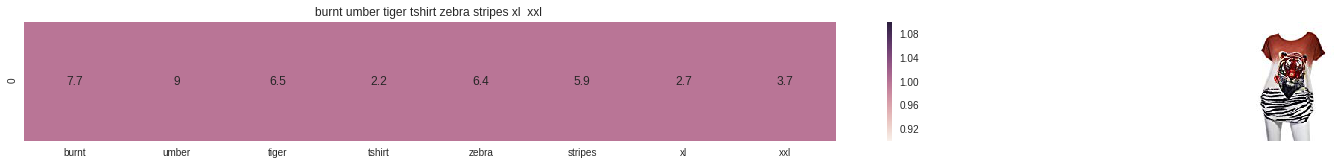

ASIN : B00JXQB5FQ
Brand : Si Row
euclidean distance from the given image : 0.0
https://images-na.ssl-images-amazon.com/images/I/51idp4BP50L._SL160_.jpg


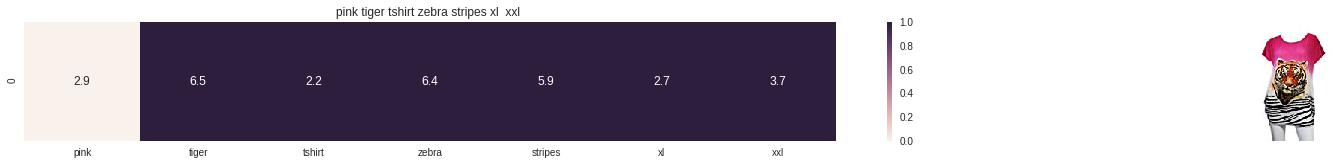

ASIN : B00JXQASS6
Brand : Si Row
euclidean distance from the given image : 12.20507131122177
https://images-na.ssl-images-amazon.com/images/I/51tOiBaq5FL._SL160_.jpg


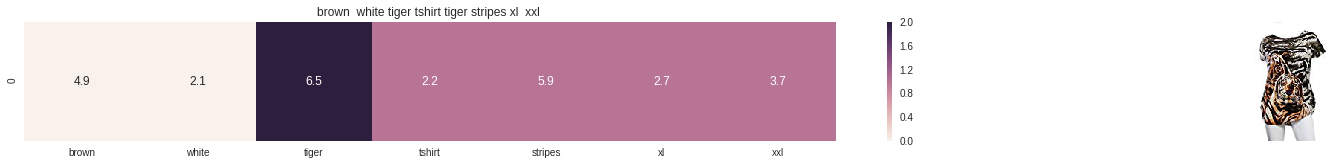

ASIN : B00JXQCWTO
Brand : Si Row
euclidean distance from the given image : 14.468362685603465
https://images-na.ssl-images-amazon.com/images/I/51WmlCKqC-L._SL160_.jpg


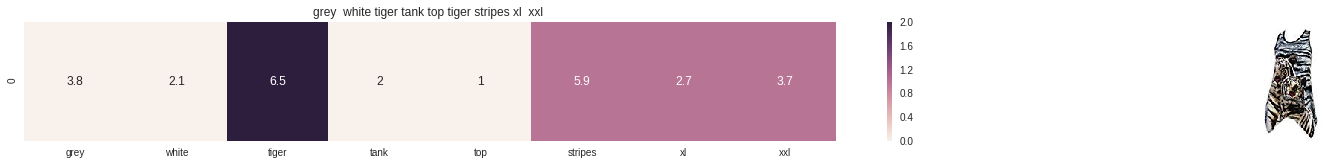

ASIN : B00JXQAFZ2
Brand : Si Row
euclidean distance from the given image : 14.486832924778964
https://images-na.ssl-images-amazon.com/images/I/51YtMh1qC5L._SL160_.jpg


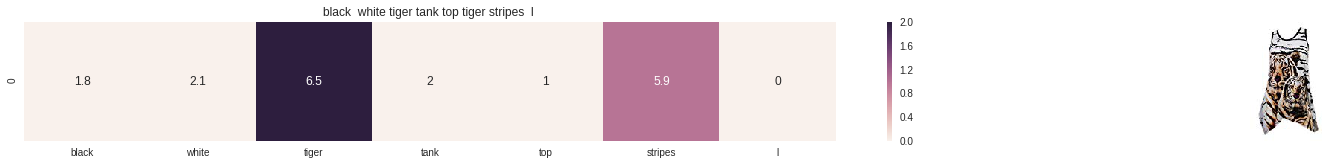

ASIN : B00JXQAO94
Brand : Si Row
euclidean distance from the given image : 14.833392966672909
https://images-na.ssl-images-amazon.com/images/I/511SmrC%2BS1L._SL160_.jpg


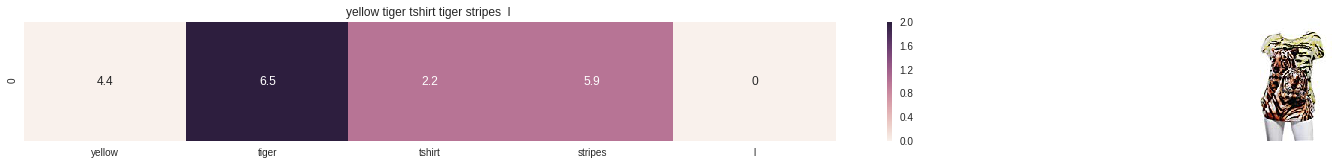

ASIN : B00JXQCUIC
Brand : Si Row
euclidean distance from the given image : 14.898744516719225
https://images-na.ssl-images-amazon.com/images/I/51VrT%2BmJ15L._SL160_.jpg


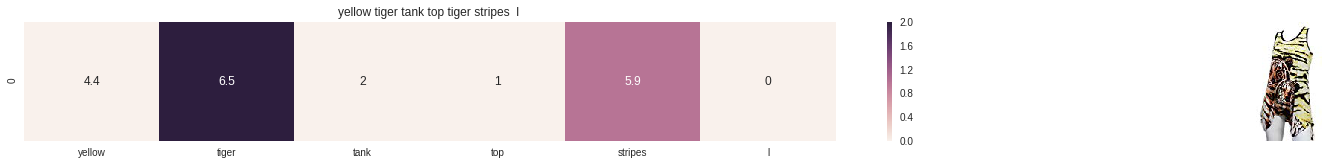

ASIN : B00JXQAUWA
Brand : Si Row
euclidean distance from the given image : 15.224458287343769
https://images-na.ssl-images-amazon.com/images/I/41W15g8czdL._SL160_.jpg


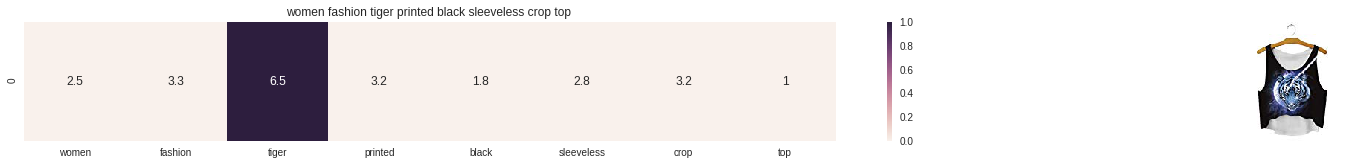

ASIN : B074T8ZYGX
Brand : MKP Crop Top
euclidean distance from the given image : 17.080812955631995
https://images-na.ssl-images-amazon.com/images/I/41uzs6HHNcL._SL160_.jpg


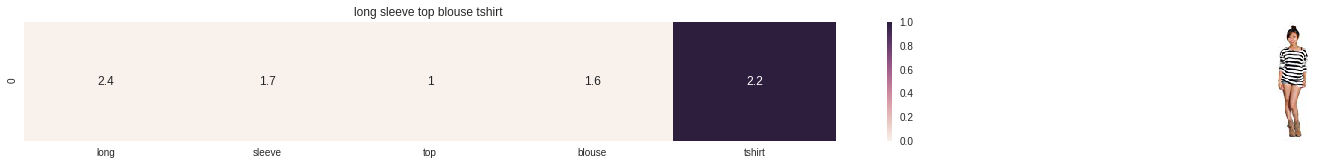

ASIN : B00KF2N5PU
Brand : Vietsbay
euclidean distance from the given image : 17.090168125645416
https://images-na.ssl-images-amazon.com/images/I/31rLavf15fL._SL160_.jpg


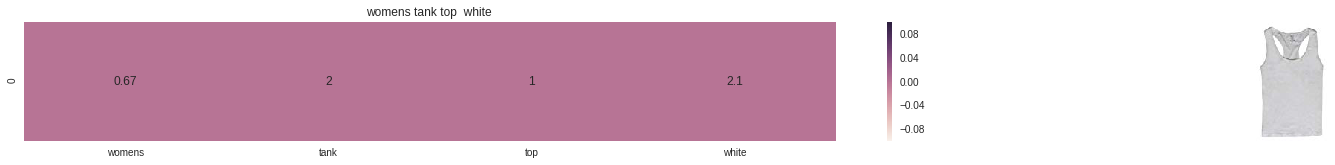

ASIN : B00JPOZ9GM
Brand : Sofra
euclidean distance from the given image : 17.153215337562703
https://images-na.ssl-images-amazon.com/images/I/41isRRC9JpL._SL160_.jpg


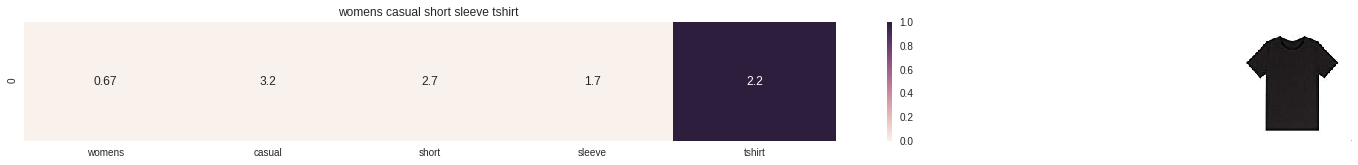

ASIN : B074T9KG9Q
Brand : Rain
euclidean distance from the given image : 17.33671523874989
https://images-na.ssl-images-amazon.com/images/I/41vaIqe7CwL._SL160_.jpg


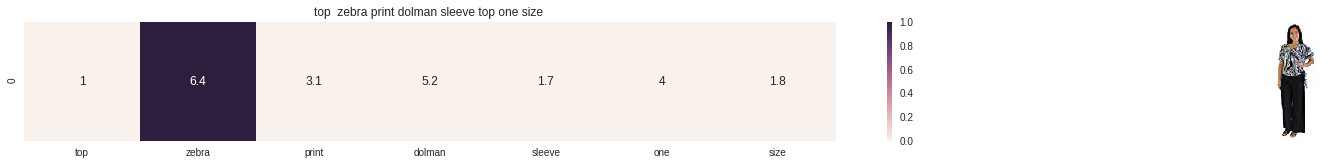

ASIN : B00H8A6ZLI
Brand : Vivian's Fashions
euclidean distance from the given image : 17.410075941001253
https://images-na.ssl-images-amazon.com/images/I/41s%2BZVj9qmL._SL160_.jpg


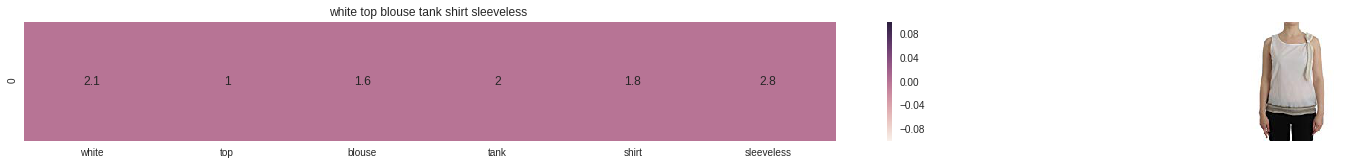

ASIN : B074G5G5RK
Brand : ERMANNO SCERVINO
euclidean distance from the given image : 17.539921335459557
https://images-na.ssl-images-amazon.com/images/I/41xG4P296RL._SL160_.jpg


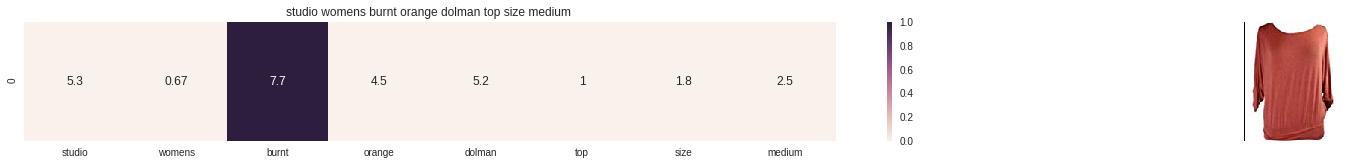

ASIN : B06XSCVFT5
Brand : Studio M
euclidean distance from the given image : 17.61275854366134
https://images-na.ssl-images-amazon.com/images/I/31-E5DKrdPL._SL160_.jpg


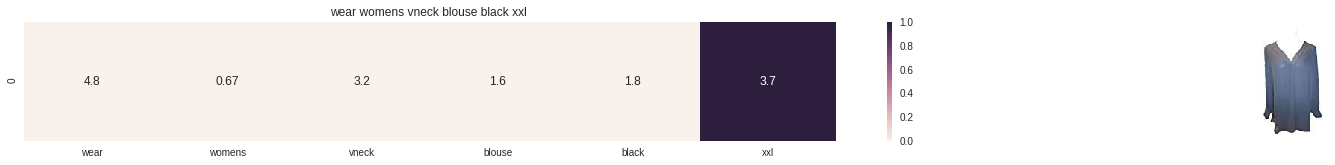

ASIN : B06Y6FH453
Brand : Who What Wear
euclidean distance from the given image : 17.623745282500135
https://images-na.ssl-images-amazon.com/images/I/31Z9JfxgAjL._SL160_.jpg


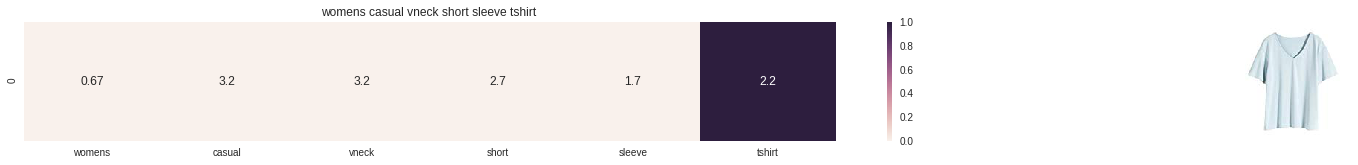

ASIN : B074V45DCX
Brand : Rain
euclidean distance from the given image : 17.634342496835046
https://images-na.ssl-images-amazon.com/images/I/51TgZ1b4QJL._SL160_.jpg


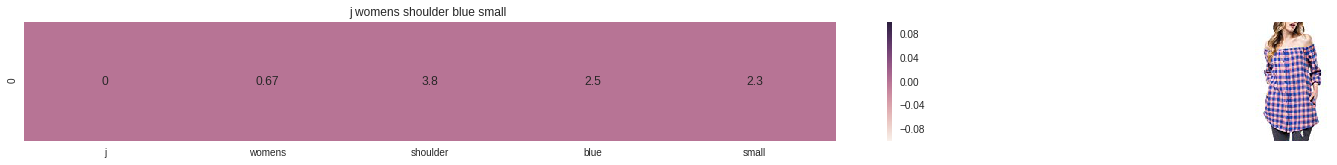

ASIN : B07583CQFT
Brand : Very J
euclidean distance from the given image : 17.63753712743611
https://images-na.ssl-images-amazon.com/images/I/417-GV2K3iL._SL160_.jpg


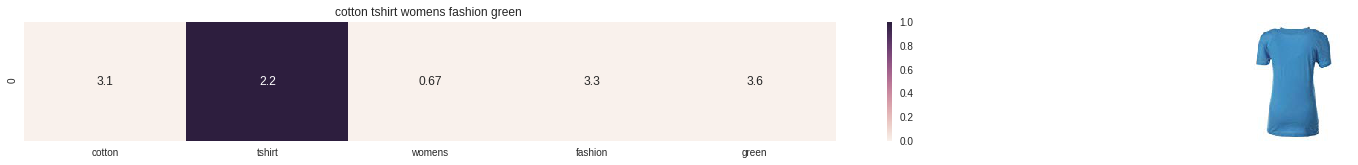

ASIN : B073GJGVBN
Brand : Ivan Levi
euclidean distance from the given image : 17.7230738913371
https://images-na.ssl-images-amazon.com/images/I/51XBEBD-tUL._SL160_.jpg


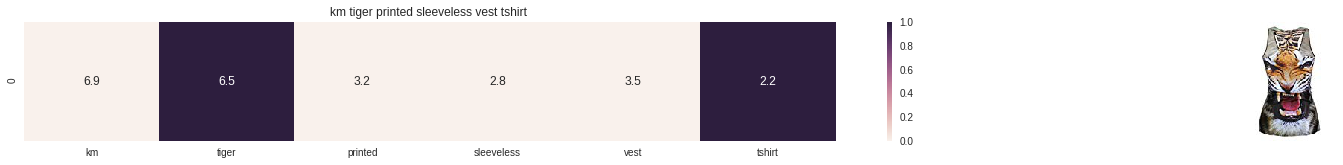

ASIN : B012VQLT6Y
Brand : KM T-shirt
euclidean distance from the given image : 17.762588561202364
https://images-na.ssl-images-amazon.com/images/I/51r39W5CXyL._SL160_.jpg


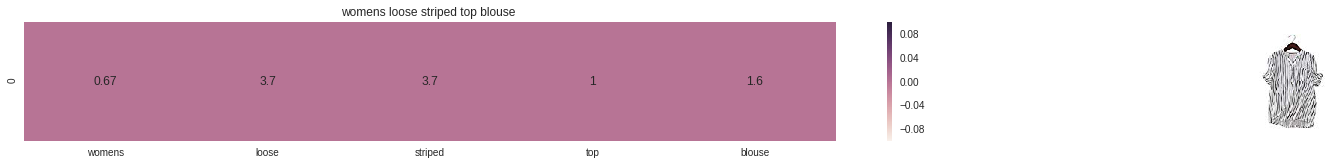

ASIN : B00ZZMYBRG
Brand : HP-LEISURE
euclidean distance from the given image : 17.779536864674238


In [16]:
def idf_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric we used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(idf_title_features,idf_title_features[doc_id])

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        get_result(indices[i],data['title'].loc[df_indices[0]], data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], 'idf')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        print ('euclidean distance from the given image :', pdists[i])
        print('='*125)

        
        
idf_model(12566,20)
# in the output heat map each value represents the idf values of the label word, the color represents the intersection with inputs title

<h2>Model With  brand , color and idf based Features with weighted pairwise similarities</h2>

In [0]:
data['brand'].fillna(value="Not given", inplace=True )

# replace spaces with hypen
brands = [x.replace(" ", "-") for x in data['brand'].values]
types = [x.replace(" ", "-") for x in data['product_type_name'].values]
colors = [x.replace(" ", "-") for x in data['color'].values]

brand_vectorizer = CountVectorizer()
brand_features = brand_vectorizer.fit_transform(brands)

type_vectorizer = CountVectorizer()
type_features = type_vectorizer.fit_transform(types)

color_vectorizer = CountVectorizer()
color_features = color_vectorizer.fit_transform(colors)

extra_features = hstack((brand_features, type_features, color_features)).tocsr()

https://images-na.ssl-images-amazon.com/images/I/51a33K-9qfL._SL160_.jpg


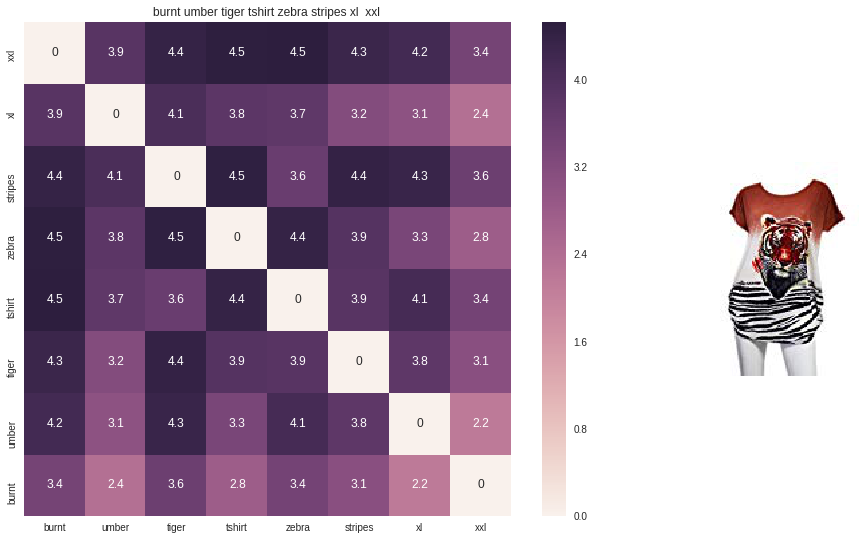

ASIN : B00JXQB5FQ
BRAND : Si Row
euclidean distance from given input image : 0.0
https://images-na.ssl-images-amazon.com/images/I/51tOiBaq5FL._SL160_.jpg


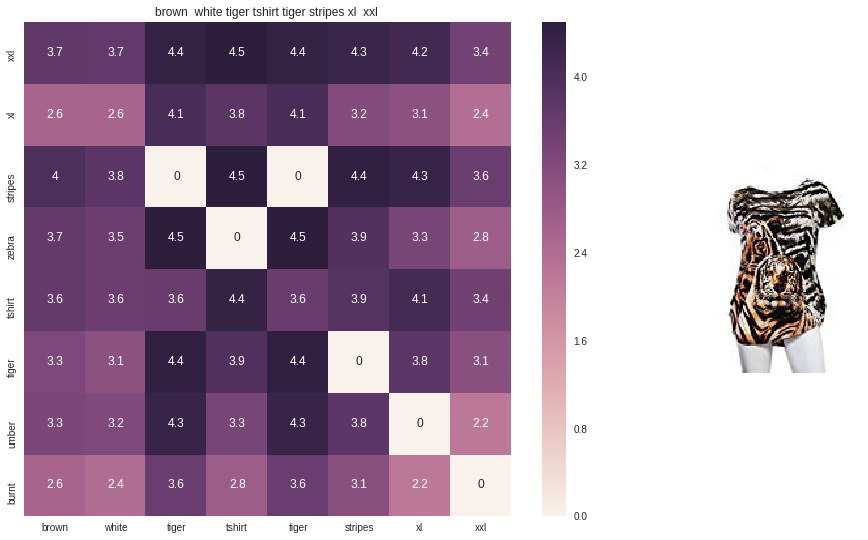

ASIN : B00JXQCWTO
BRAND : Si Row
euclidean distance from given input image : 2.4113937809339108
https://images-na.ssl-images-amazon.com/images/I/51idp4BP50L._SL160_.jpg


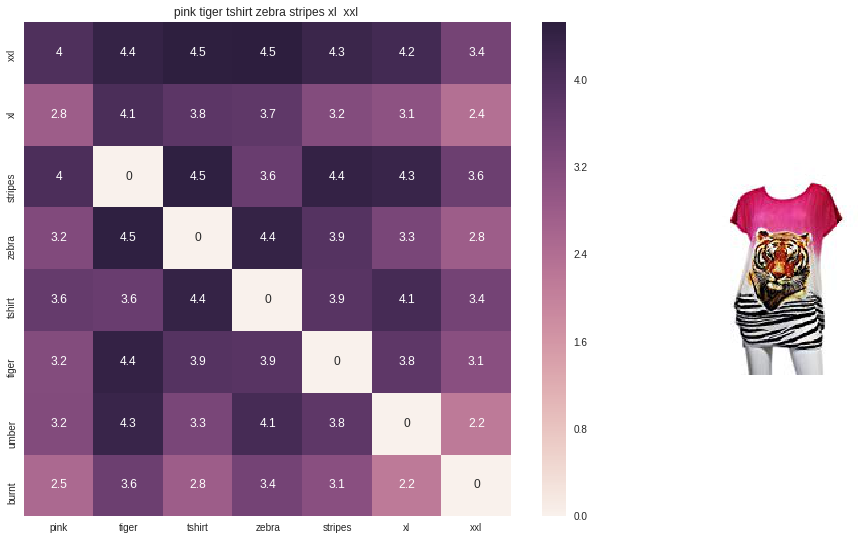

ASIN : B00JXQASS6
BRAND : Si Row
euclidean distance from given input image : 3.2126898538478748
https://images-na.ssl-images-amazon.com/images/I/51WmlCKqC-L._SL160_.jpg


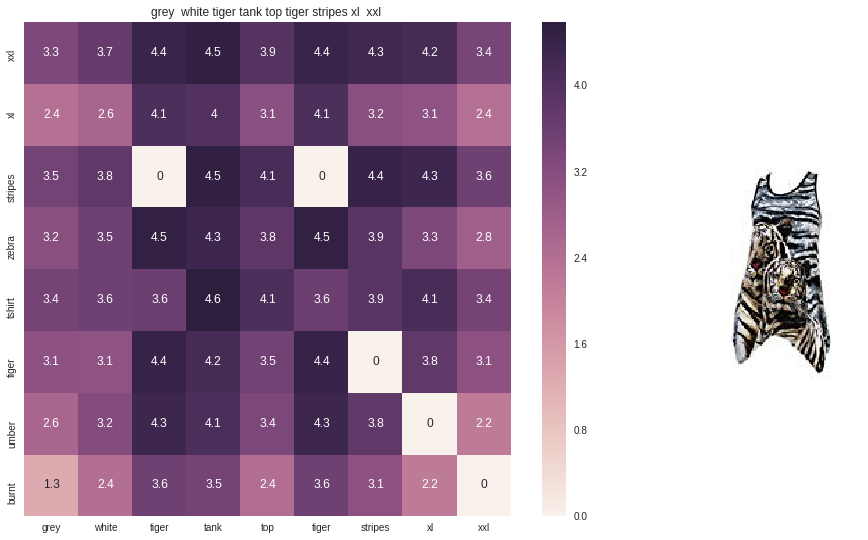

ASIN : B00JXQAFZ2
BRAND : Si Row
euclidean distance from given input image : 3.5929834561074068
https://images-na.ssl-images-amazon.com/images/I/51YtMh1qC5L._SL160_.jpg


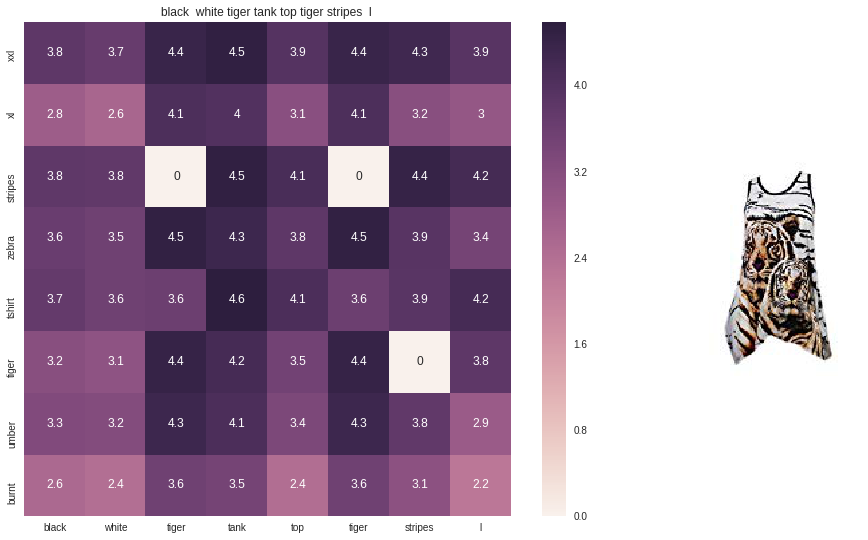

ASIN : B00JXQAO94
BRAND : Si Row
euclidean distance from given input image : 3.650743463089731
https://images-na.ssl-images-amazon.com/images/I/511SmrC%2BS1L._SL160_.jpg


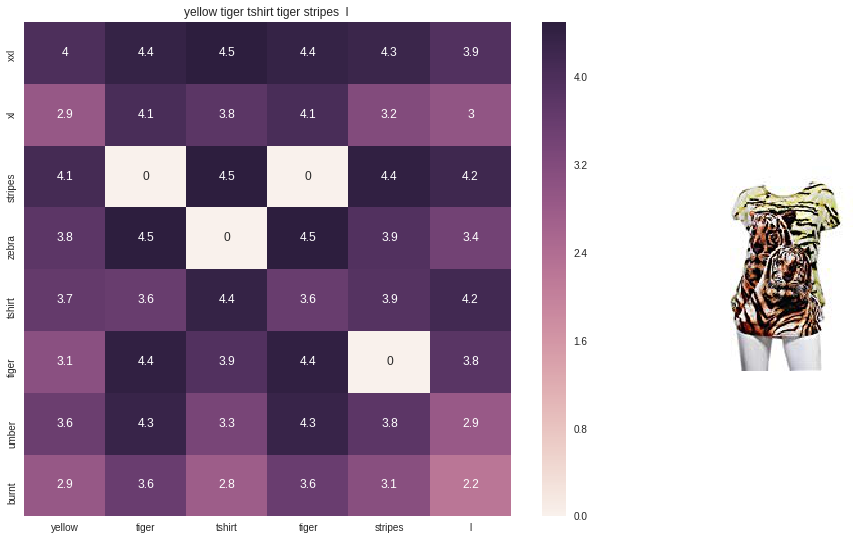

ASIN : B00JXQCUIC
BRAND : Si Row
euclidean distance from given input image : 3.66163538809745
https://images-na.ssl-images-amazon.com/images/I/51VrT%2BmJ15L._SL160_.jpg


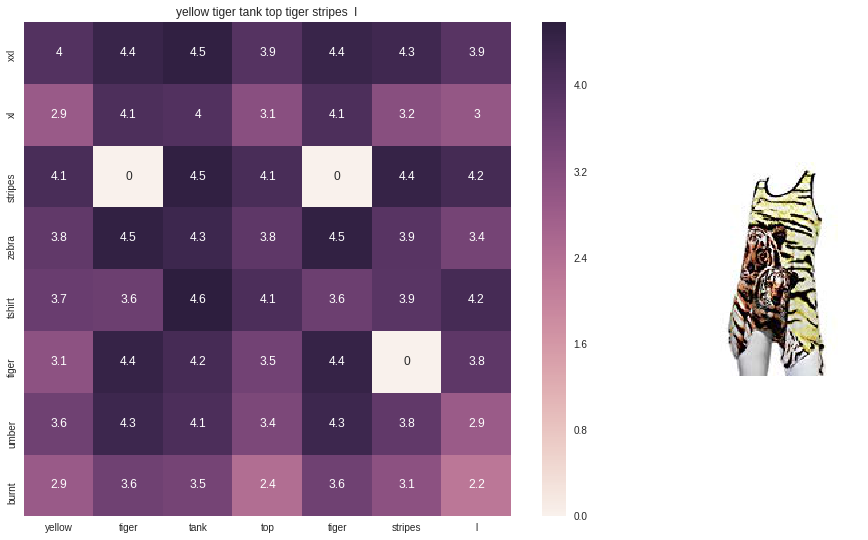

ASIN : B00JXQAUWA
BRAND : Si Row
euclidean distance from given input image : 3.715921016534874
https://images-na.ssl-images-amazon.com/images/I/51ERwuORnqL._SL160_.jpg


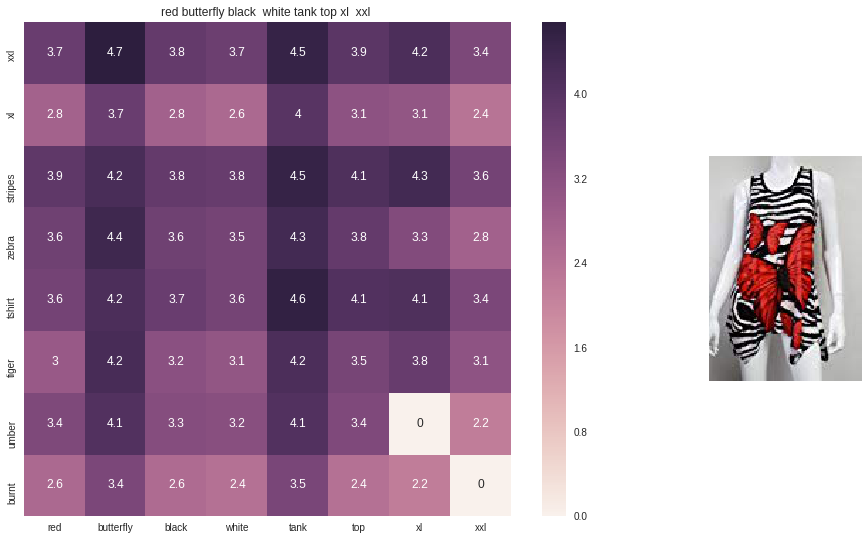

ASIN : B00JV63CW2
BRAND : Si Row
euclidean distance from given input image : 4.175937314344639
https://images-na.ssl-images-amazon.com/images/I/51-Iz5leaXL._SL160_.jpg


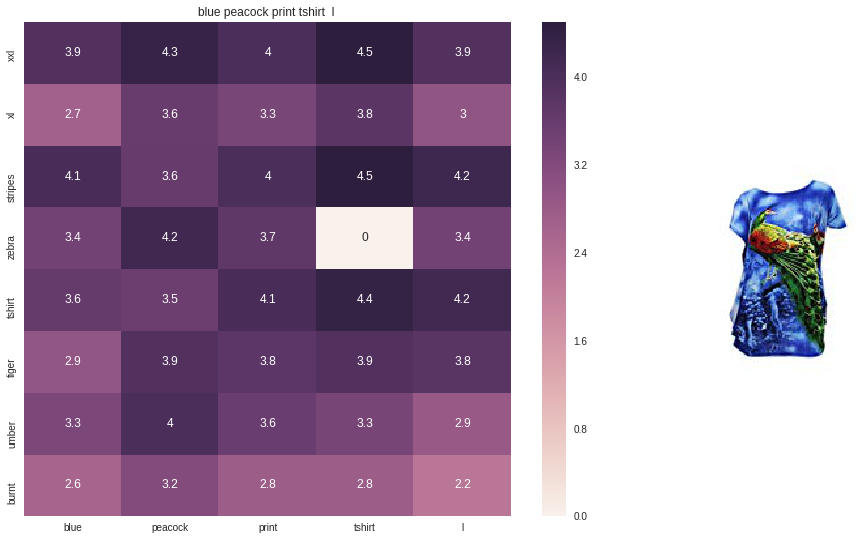

ASIN : B00JXQC8L6
BRAND : Si Row
euclidean distance from given input image : 4.283268121493833
https://images-na.ssl-images-amazon.com/images/I/51IaEuQL5IL._SL160_.jpg


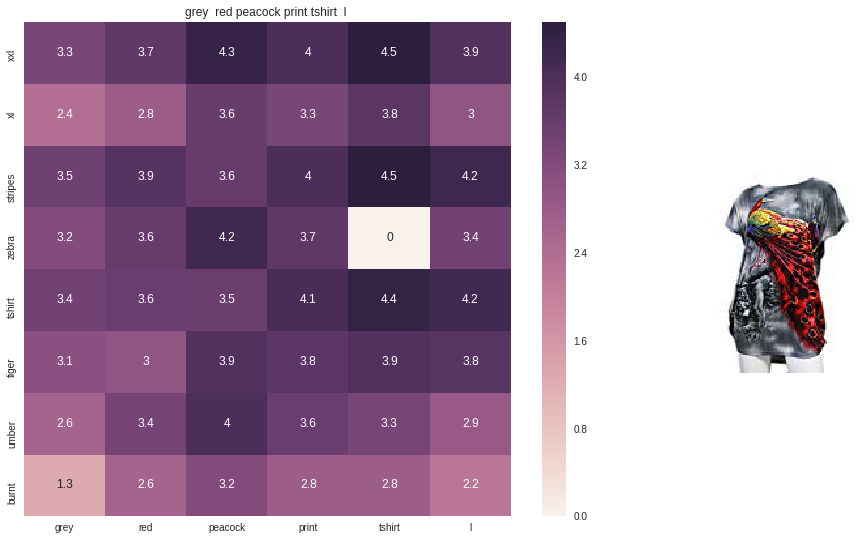

ASIN : B00JXQCFRS
BRAND : Si Row
euclidean distance from given input image : 4.360874801716796
https://images-na.ssl-images-amazon.com/images/I/51eZW84Nv1L._SL160_.jpg


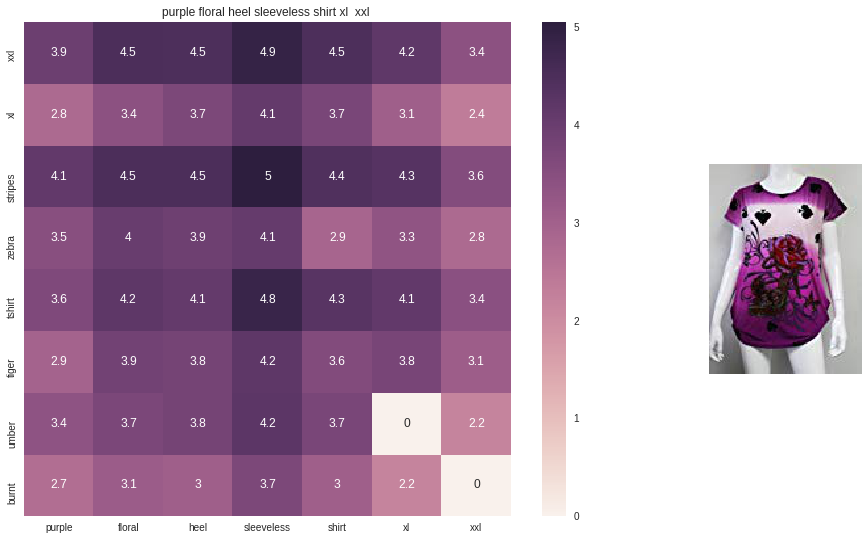

ASIN : B00JV63VC8
BRAND : Si Row
euclidean distance from given input image : 4.369935845703142
https://images-na.ssl-images-amazon.com/images/I/51bn7u17uzL._SL160_.jpg


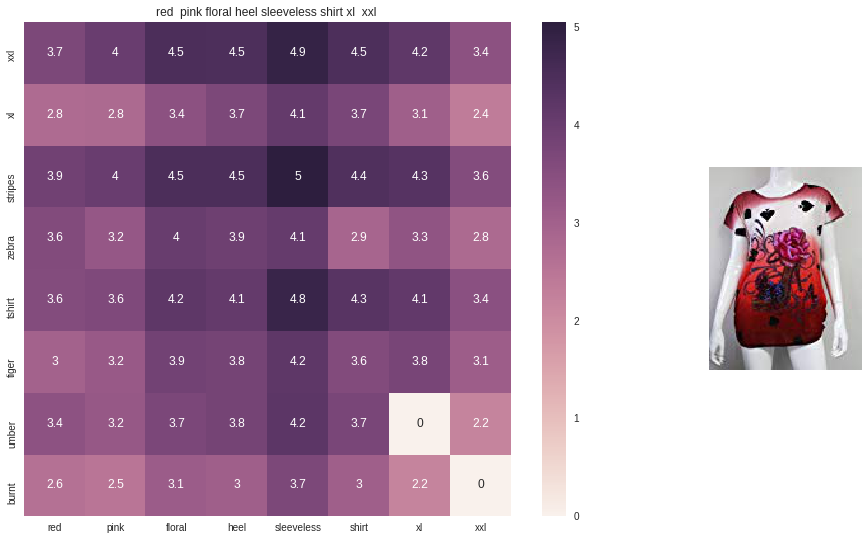

ASIN : B00JV63QQE
BRAND : Si Row
euclidean distance from given input image : 4.385448281044222
https://images-na.ssl-images-amazon.com/images/I/51goebaETWL._SL160_.jpg


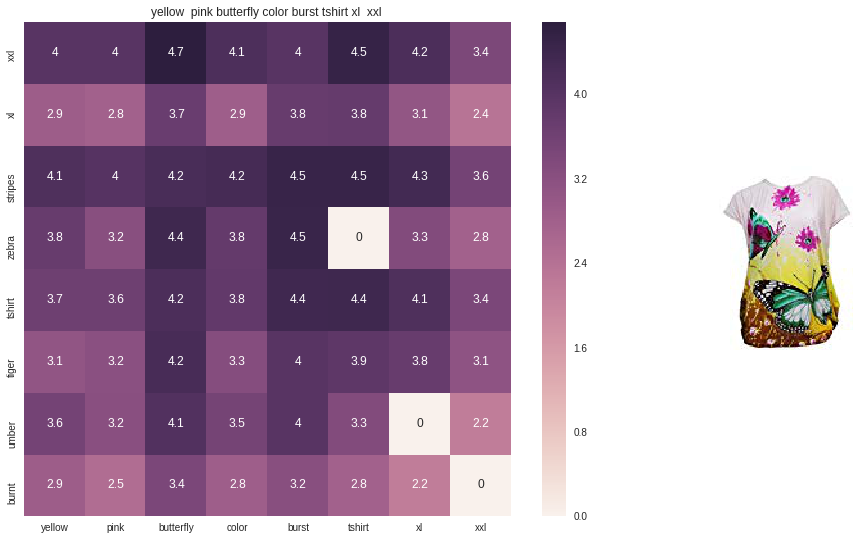

ASIN : B00JXQBBMI
BRAND : Si Row
euclidean distance from given input image : 4.556007958883801
https://images-na.ssl-images-amazon.com/images/I/51Gf4Yp5xYL._SL160_.jpg


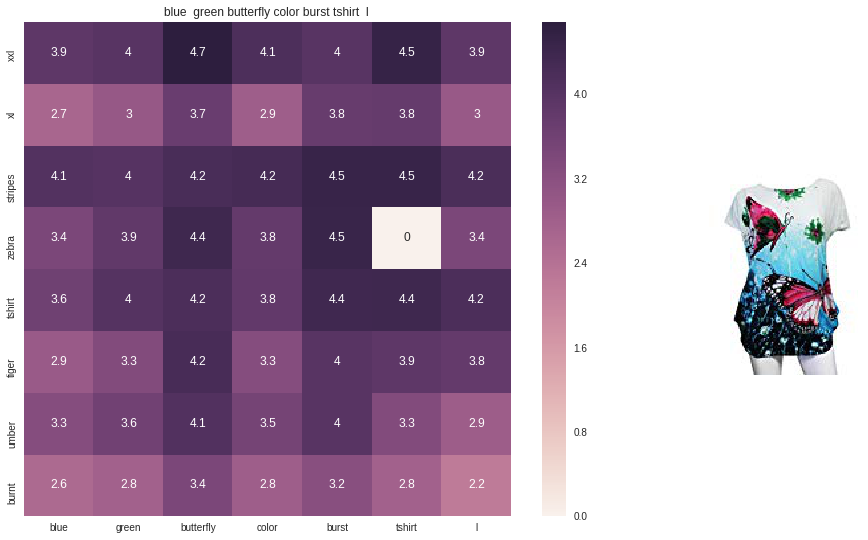

ASIN : B00JXQC0C8
BRAND : Si Row
euclidean distance from given input image : 4.60768241249344
https://images-na.ssl-images-amazon.com/images/I/51cOECPBaJL._SL160_.jpg


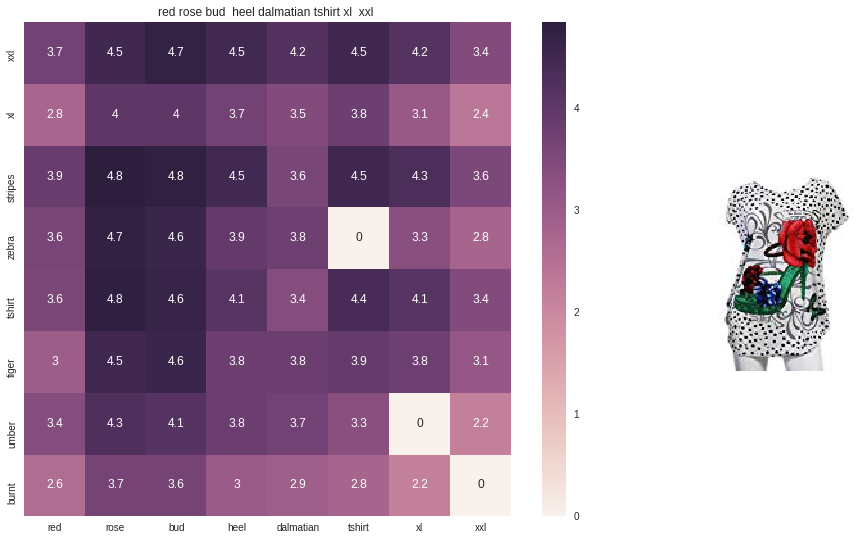

ASIN : B00JXQABB0
BRAND : Si Row
euclidean distance from given input image : 4.937647279240269
https://images-na.ssl-images-amazon.com/images/I/51CAd0pIMrL._SL160_.jpg


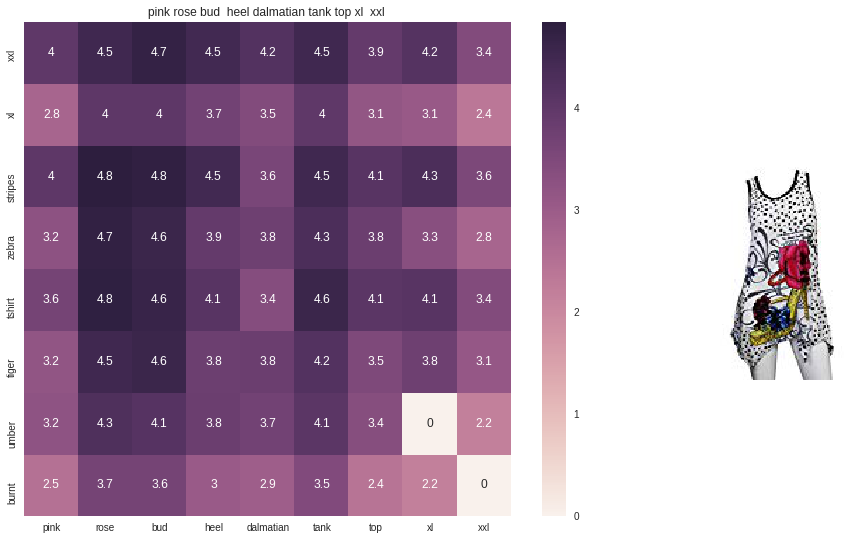

ASIN : B00JXQAX2C
BRAND : Si Row
euclidean distance from given input image : 4.9692861860685005
https://images-na.ssl-images-amazon.com/images/I/41uzs6HHNcL._SL160_.jpg


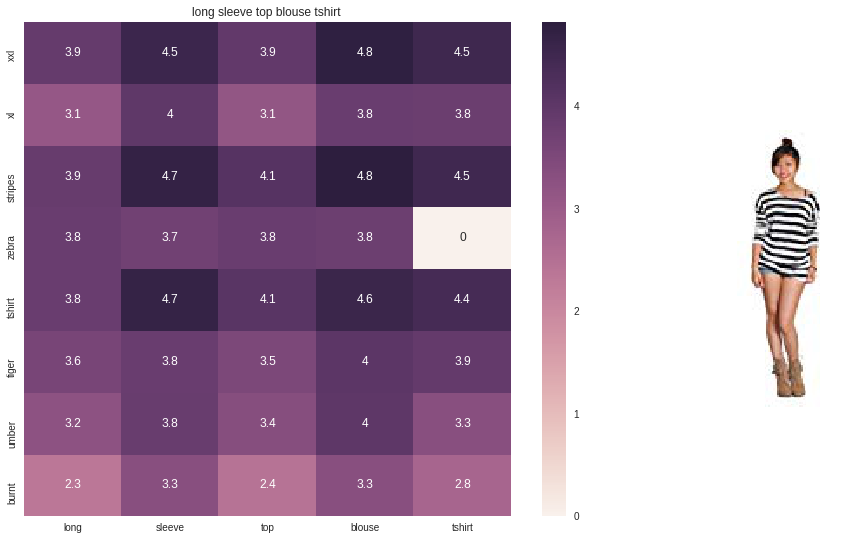

ASIN : B00KF2N5PU
BRAND : Vietsbay
euclidean distance from given input image : 5.053154113494728
https://images-na.ssl-images-amazon.com/images/I/31rLavf15fL._SL160_.jpg


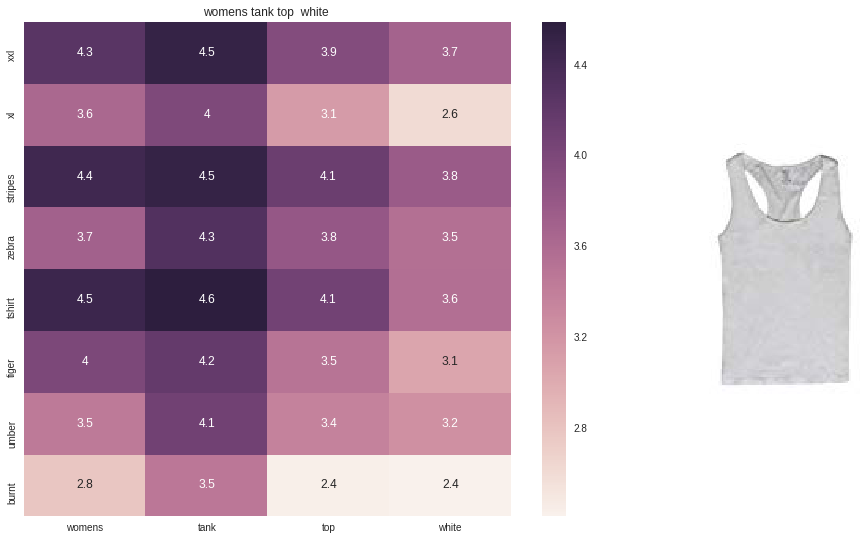

ASIN : B00JPOZ9GM
BRAND : Sofra
euclidean distance from given input image : 5.063661982147609
https://images-na.ssl-images-amazon.com/images/I/31dgzD5abQL._SL160_.jpg


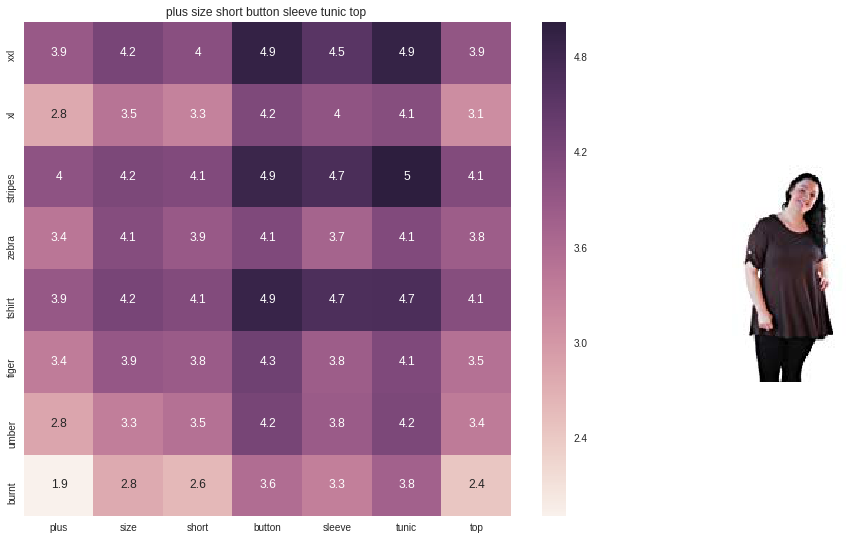

ASIN : B00JMA1W38
BRAND : Girltalk clothing
euclidean distance from given input image : 5.070883984480589
https://images-na.ssl-images-amazon.com/images/I/41EaFZRmodL._SL160_.jpg


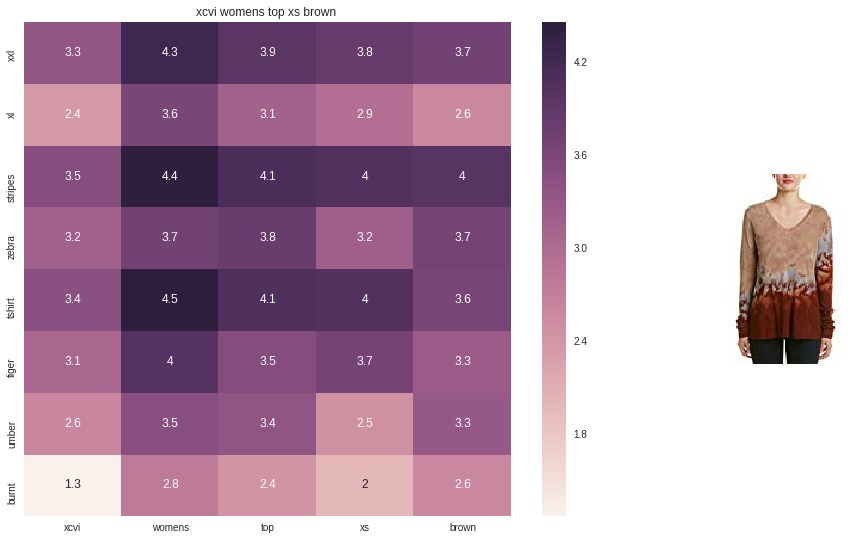

ASIN : B01N7V7SIG
BRAND : XCVI
euclidean distance from given input image : 5.077864333736433


In [112]:
def idf_model_brand_color(doc_id,w1,w2, num_results):

    idf_w2v_dist = pairwise_distances(idf_title_features,idf_title_features[doc_id])
    ex_feat_dist = pairwise_distances(extra_features, extra_features[doc_id])
    pairwise_dist   = (w1 * idf_w2v_dist +  w2 * ex_feat_dist)/float(w1 + w2)

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])

    for i in range(0,len(indices)):
        heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['medium_image_url'].loc[df_indices[i]], indices[0], indices[i], 'avg')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('BRAND :',data['brand'].loc[df_indices[i]])
        print ('euclidean distance from given input image :', pdists[i])
        print('='*125)

        
        
idf_model_brand_color(12566,1,5,20)
# in the output heat map each value represents the idf values of the label word, the color represents the intersection with inputs title

<h2>Model With brand , color,  idf based Features and Image vector Features(CNN) with weighted pairwise similarities</h2>

In [0]:
#load the features and corresponding ASINS info.
bottleneck_features_train = np.load('./drive/My Drive/Applied_AI_Workshop_Code_Data/16k_data_cnn_features.npy')
asins = np.load('./drive/My Drive/Applied_AI_Workshop_Code_Data/16k_data_cnn_feature_asins.npy')
asins = list(asins)

# load the original 16K dataset
#data = pd.read_pickle('pickels/16k_apperal_data_preprocessed')
df_asins = list(data['asin'])


from IPython.display import display, SVG, Math, YouTubeVideo

from IPython.display import Image as img

In [29]:
bottleneck_features_train.shape

(16042, 25088)

In [0]:
from IPython.display import display, SVG, Math, YouTubeVideo

from IPython.display import Image as img

In [0]:
def get_similar_products_cnn(doc_id,w1,w2,w3, num_results):
    doc_id1 = asins.index(df_asins[doc_id])
    image_pairwise_dist = pairwise_distances(bottleneck_features_train, bottleneck_features_train[doc_id1].reshape(1,-1))
    idf_dist = pairwise_distances(idf_title_features,idf_title_features[doc_id])
    ex_feat_dist = pairwise_distances(extra_features, extra_features[doc_id])
    pairwise_dist   = (w1 * idf_dist +  w2 * ex_feat_dist+w3*image_pairwise_dist)/float(w1 + w2+w3)


    #data frame indices of the 9 smallest distace's
    


    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]
    df_indices = list(data.index[indices])
    text=''
    _url=''
    doc=0
    for i in range(len(indices)):
        #print(df_indices)
        rows = data[['medium_image_url','title']].loc[data['asin']==asins[indices[i]]]

        
        for indx, row in rows.iterrows():
            if i==0:
              text=row['title']
              _url=row['medium_image_url']
              doc=rows.iloc[[0]].index[0]
              heat_map_w2v(text, text, _url, doc, doc, 'avg')
            else:
              heat_map_w2v(text, row['title'], row['medium_image_url'], doc, rows.iloc[[0]].index[0], 'avg')

              print('Product Title: ', row['title'])
              print('Euclidean Distance from input image:', pdists[i])
              print('Amazon Url: www.amzon.com/dp/'+ asins[indices[i]])


<h4>Equal Weighted Similarity Results</h4>

https://images-na.ssl-images-amazon.com/images/I/51a33K-9qfL._SL160_.jpg


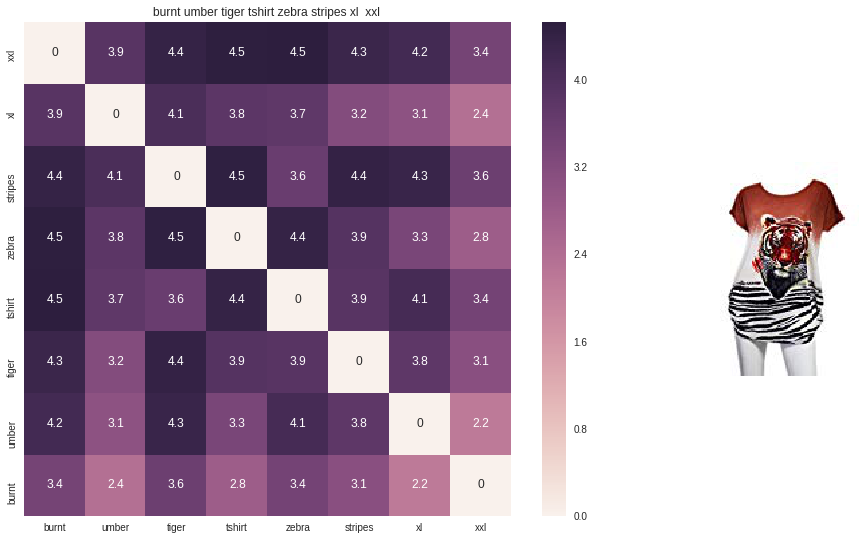

https://images-na.ssl-images-amazon.com/images/I/51idp4BP50L._SL160_.jpg


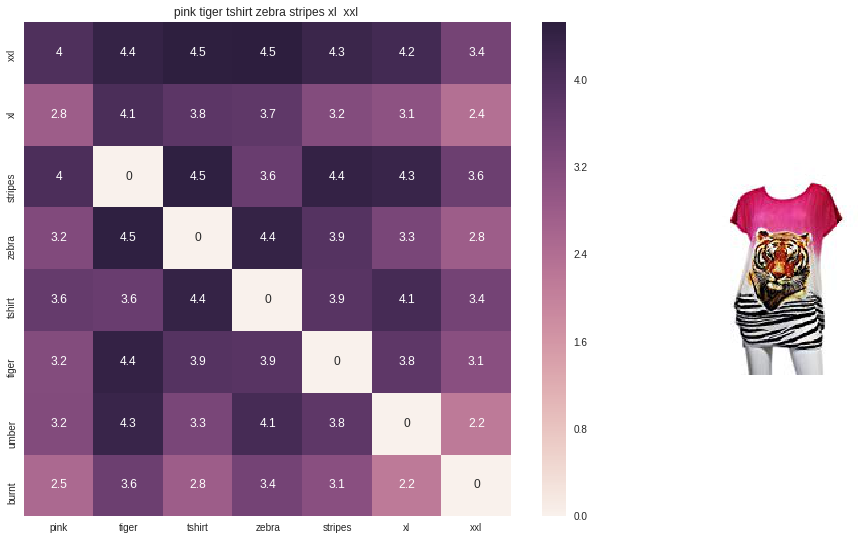

Product Title:  pink tiger tshirt zebra stripes xl  xxl 
Euclidean Distance from input image: 12.94173147598179
Amazon Url: www.amzon.com/dp/B00JXQASS6
https://images-na.ssl-images-amazon.com/images/I/511SmrC%2BS1L._SL160_.jpg


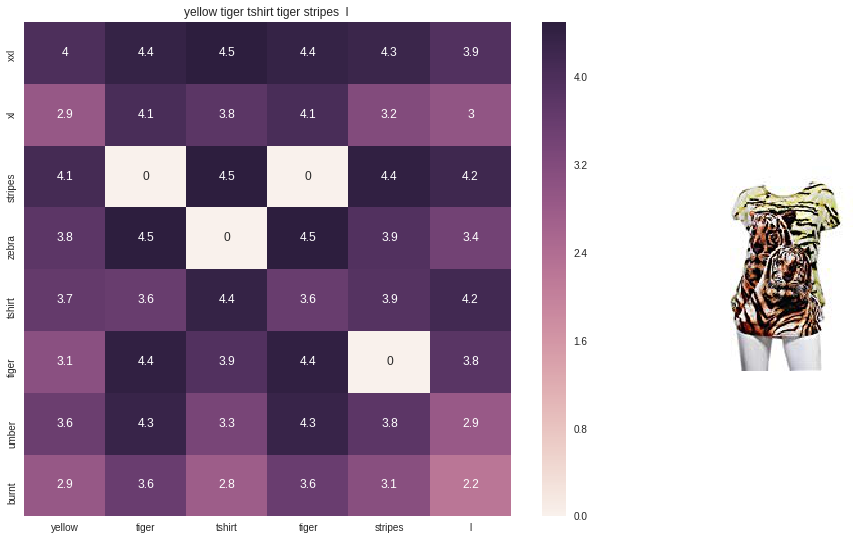

Product Title:  yellow tiger tshirt tiger stripes  l 
Euclidean Distance from input image: 15.922863297125753
Amazon Url: www.amzon.com/dp/B00JXQCUIC
https://images-na.ssl-images-amazon.com/images/I/51tOiBaq5FL._SL160_.jpg


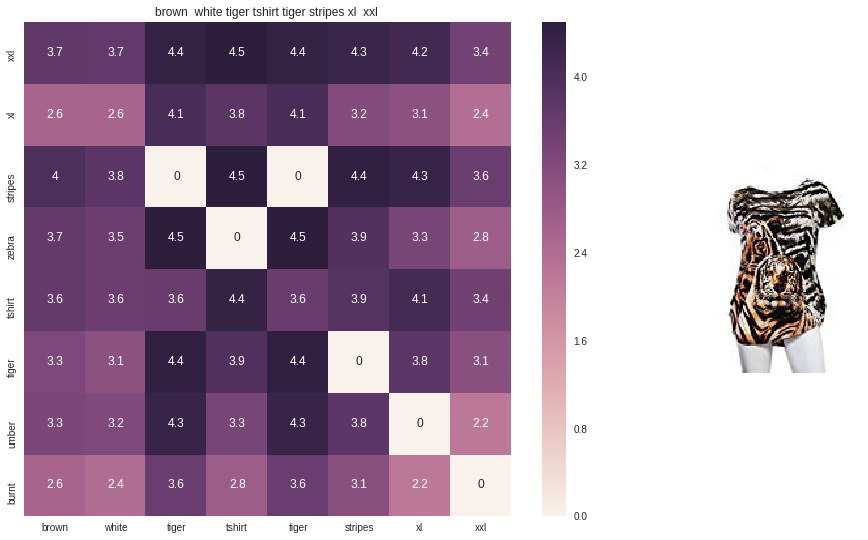

Product Title:  brown  white tiger tshirt tiger stripes xl  xxl 
Euclidean Distance from input image: 16.964435510043835
Amazon Url: www.amzon.com/dp/B00JXQCWTO
https://images-na.ssl-images-amazon.com/images/I/41MfxJB7NHL._SL160_.jpg


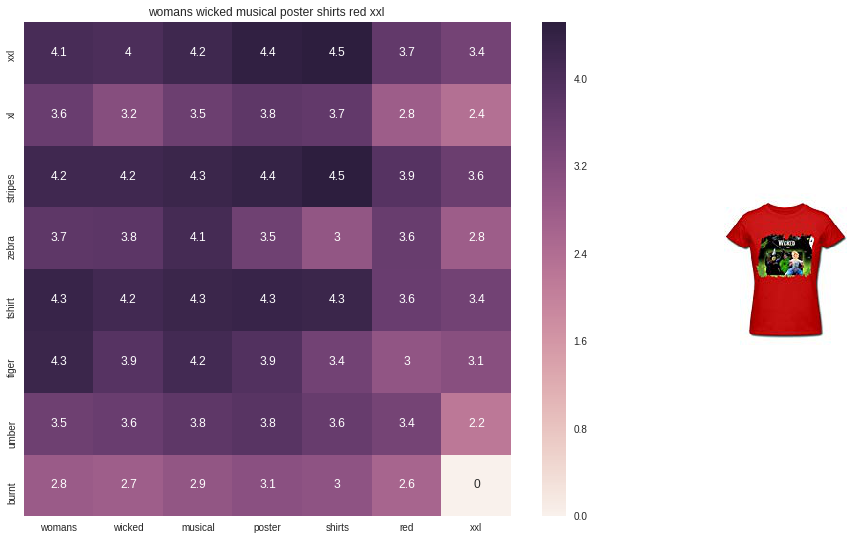

Product Title:  womans wicked musical poster shirts red xxl 
Euclidean Distance from input image: 17.49981758659255
Amazon Url: www.amzon.com/dp/B01KUN4VWE
https://images-na.ssl-images-amazon.com/images/I/518s71-5p2L._SL160_.jpg


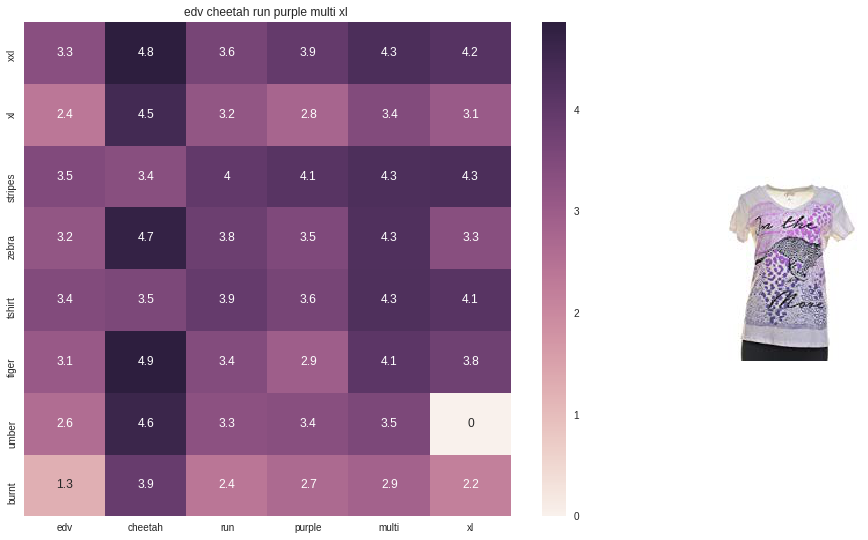

Product Title:  edv cheetah run purple multi xl 
Euclidean Distance from input image: 18.004663043840267
Amazon Url: www.amzon.com/dp/B01CUPYBM0
https://images-na.ssl-images-amazon.com/images/I/51RGoNmLPvL._SL160_.jpg


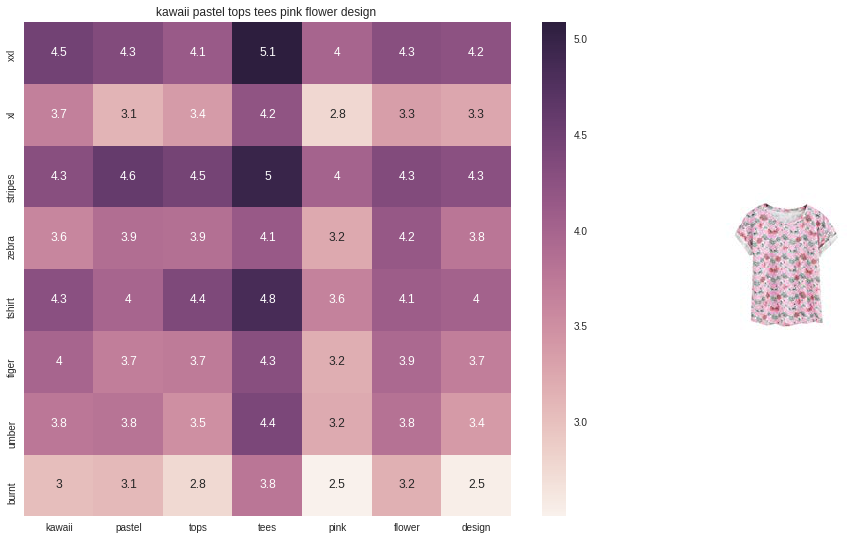

Product Title:  kawaii pastel tops tees pink flower design 
Euclidean Distance from input image: 18.113260877467155
Amazon Url: www.amzon.com/dp/B071FCWD97
https://images-na.ssl-images-amazon.com/images/I/416bBaS5WdL._SL160_.jpg


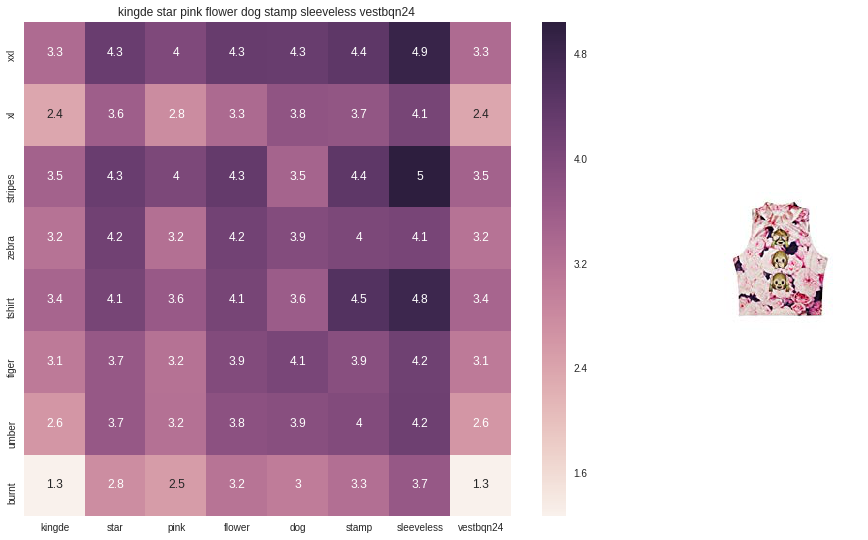

Product Title:  kingde star pink flower dog stamp sleeveless vestbqn24 
Euclidean Distance from input image: 18.127932904400172
Amazon Url: www.amzon.com/dp/B015H3W9BM
https://images-na.ssl-images-amazon.com/images/I/51XD5QetQTL._SL160_.jpg


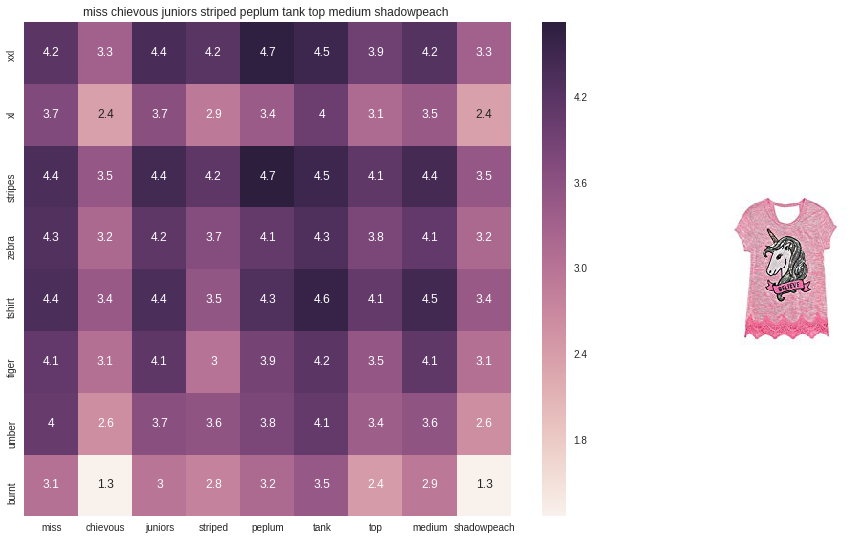

Product Title:  miss chievous juniors striped peplum tank top medium shadowpeach 
Euclidean Distance from input image: 18.149687454808724
Amazon Url: www.amzon.com/dp/B0177DM70S
https://images-na.ssl-images-amazon.com/images/I/41cbRDEic1L._SL160_.jpg


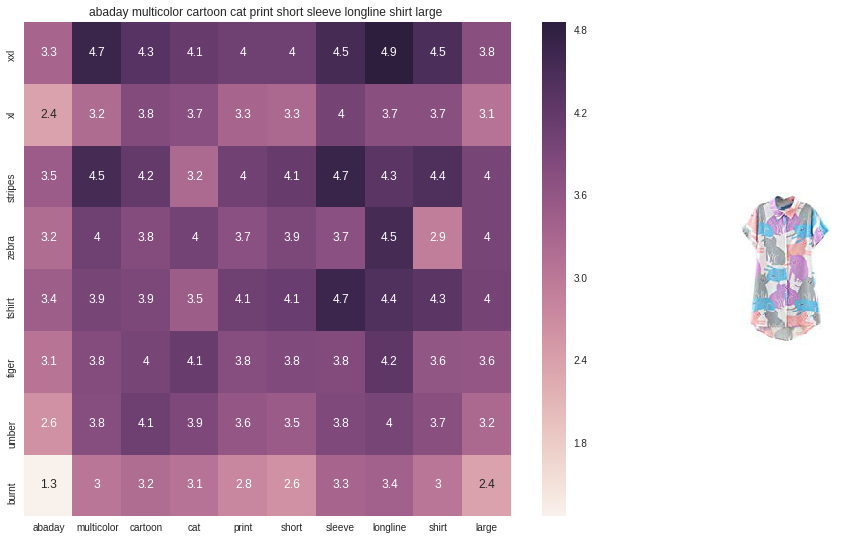

Product Title:  abaday multicolor cartoon cat print short sleeve longline shirt large 
Euclidean Distance from input image: 18.17797929565082
Amazon Url: www.amzon.com/dp/B01CR57YY0
https://images-na.ssl-images-amazon.com/images/I/416SMHNfa2L._SL160_.jpg


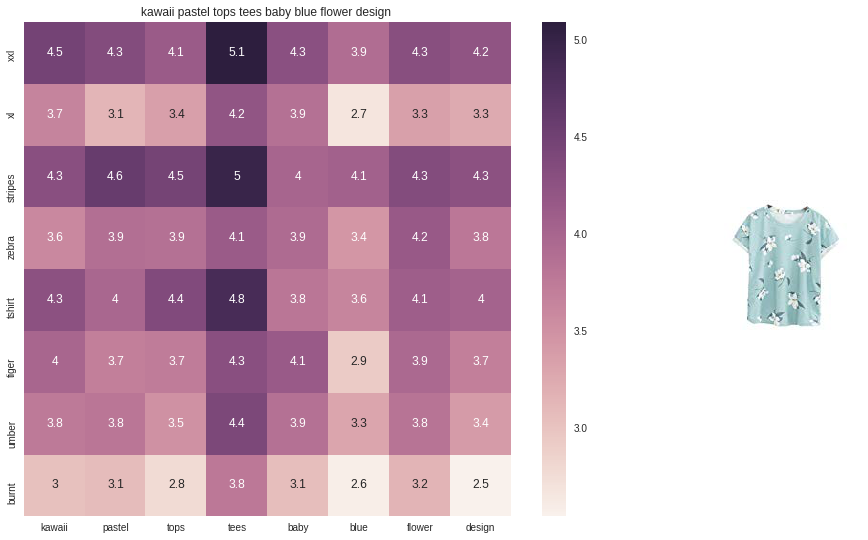

Product Title:  kawaii pastel tops tees baby blue flower design 
Euclidean Distance from input image: 18.19107464013583
Amazon Url: www.amzon.com/dp/B071SBCY9W
https://images-na.ssl-images-amazon.com/images/I/51u-P0GlqBL._SL160_.jpg


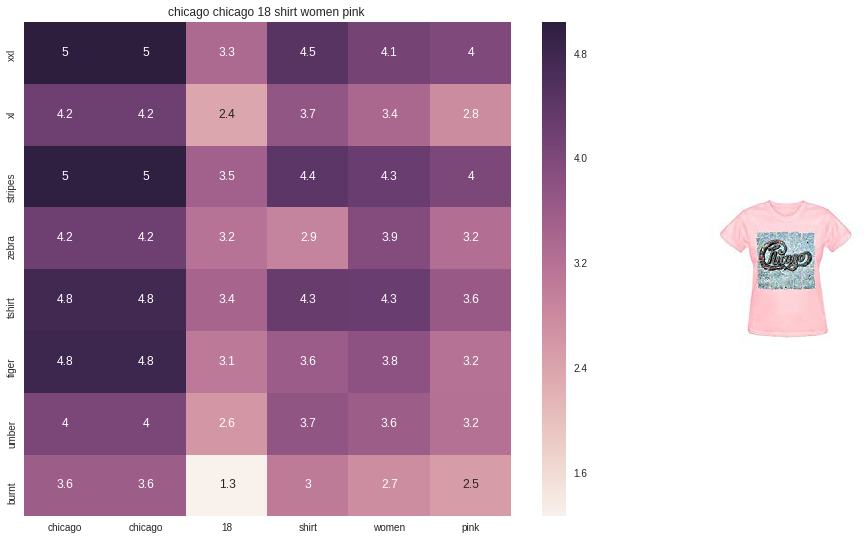

Product Title:  chicago chicago 18 shirt women pink 
Euclidean Distance from input image: 18.257236574861125
Amazon Url: www.amzon.com/dp/B01GXAZTRY
https://images-na.ssl-images-amazon.com/images/I/41s5u1SPNGL._SL160_.jpg


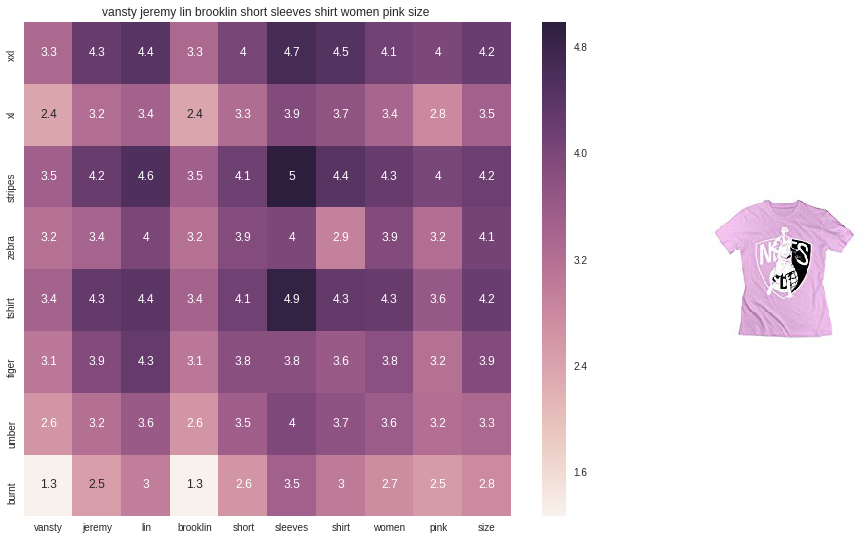

Product Title:  vansty jeremy lin brooklin short sleeves shirt women pink size 
Euclidean Distance from input image: 18.25896518628185
Amazon Url: www.amzon.com/dp/B01HU4NSBQ
https://images-na.ssl-images-amazon.com/images/I/51LsuSN6LzL._SL160_.jpg


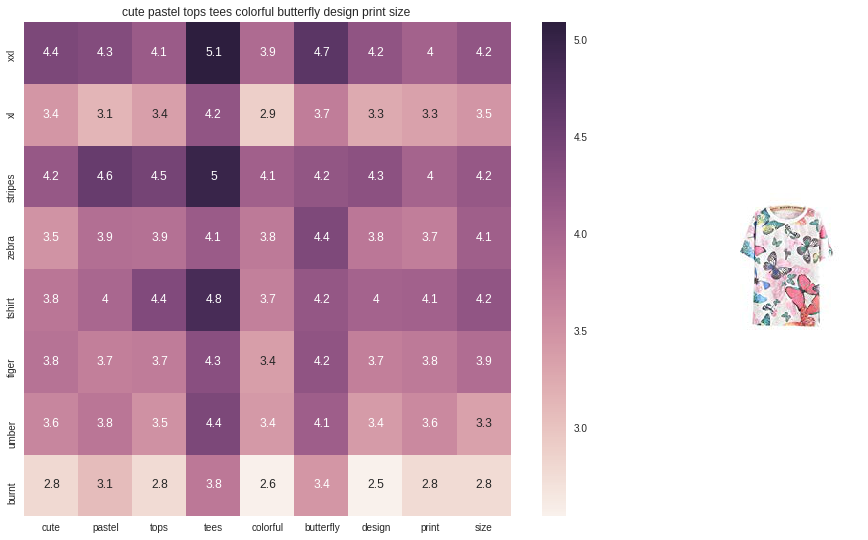

Product Title:  cute pastel tops tees colorful butterfly design print size 
Euclidean Distance from input image: 18.262287022862164
Amazon Url: www.amzon.com/dp/B019E3TD10
https://images-na.ssl-images-amazon.com/images/I/51JM205YZmL._SL160_.jpg


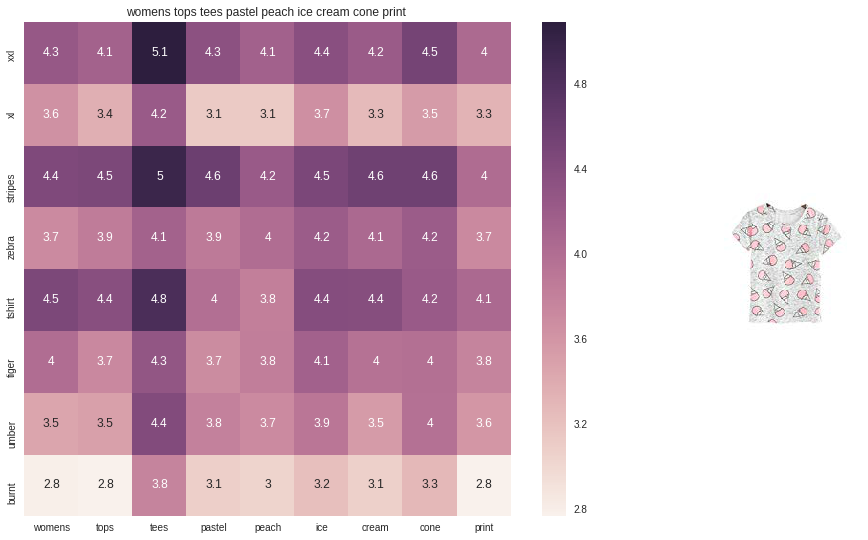

Product Title:  womens tops tees pastel peach ice cream cone print 
Euclidean Distance from input image: 18.28593945264637
Amazon Url: www.amzon.com/dp/B0734GRKZL
https://images-na.ssl-images-amazon.com/images/I/51bn7u17uzL._SL160_.jpg


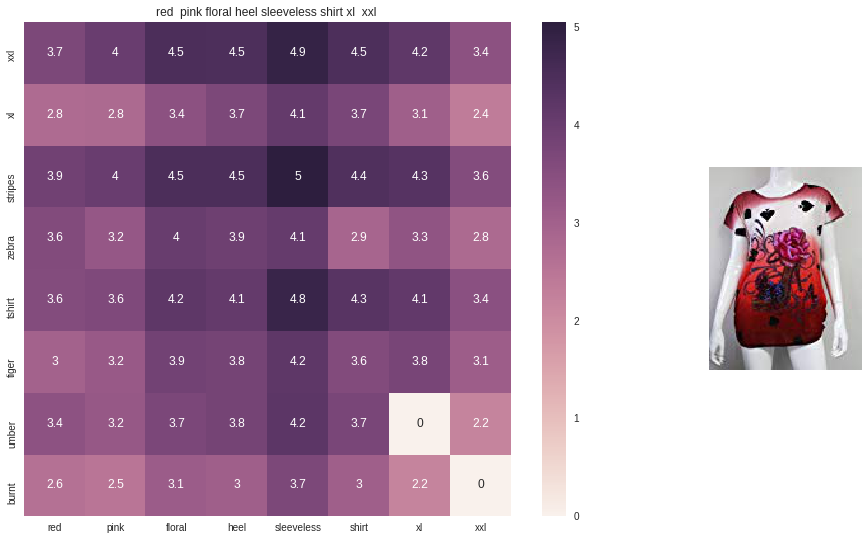

Product Title:  red  pink floral heel sleeveless shirt xl  xxl 
Euclidean Distance from input image: 18.289398058047205
Amazon Url: www.amzon.com/dp/B00JV63QQE
https://images-na.ssl-images-amazon.com/images/I/4102LGNS0gL._SL160_.jpg


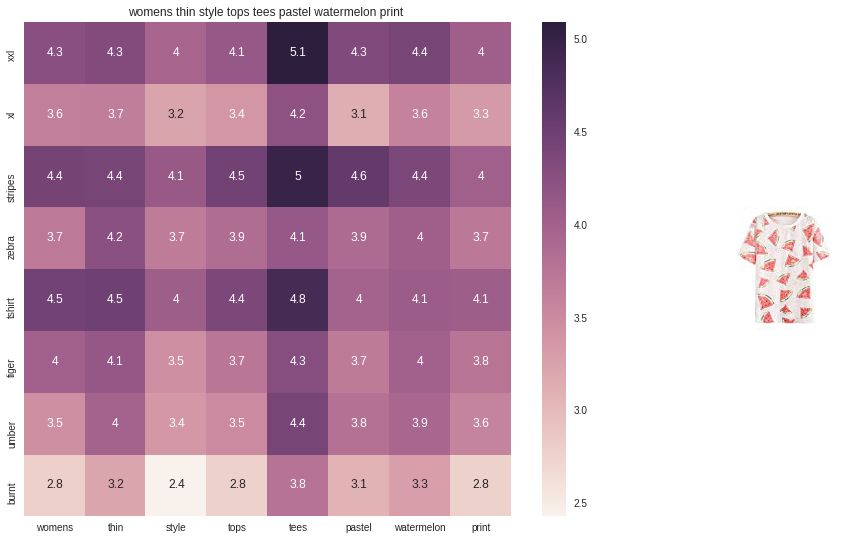

Product Title:  womens thin style tops tees pastel watermelon print 
Euclidean Distance from input image: 18.295493109280727
Amazon Url: www.amzon.com/dp/B01JUNHBRM
https://images-na.ssl-images-amazon.com/images/I/513omXMEbpL._SL160_.jpg


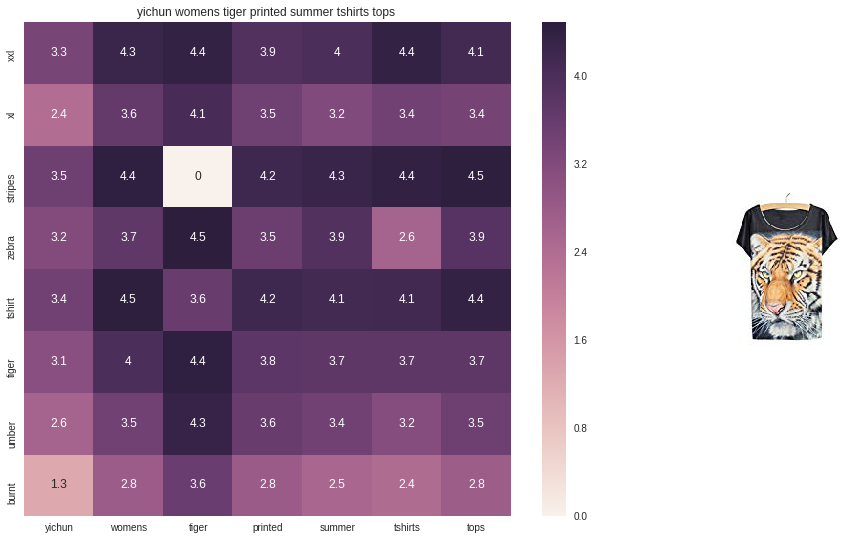

Product Title:  yichun womens tiger printed summer tshirts tops 
Euclidean Distance from input image: 18.305218818336712
Amazon Url: www.amzon.com/dp/B010NN9RXO
https://images-na.ssl-images-amazon.com/images/I/51O4mC0sgPL._SL160_.jpg


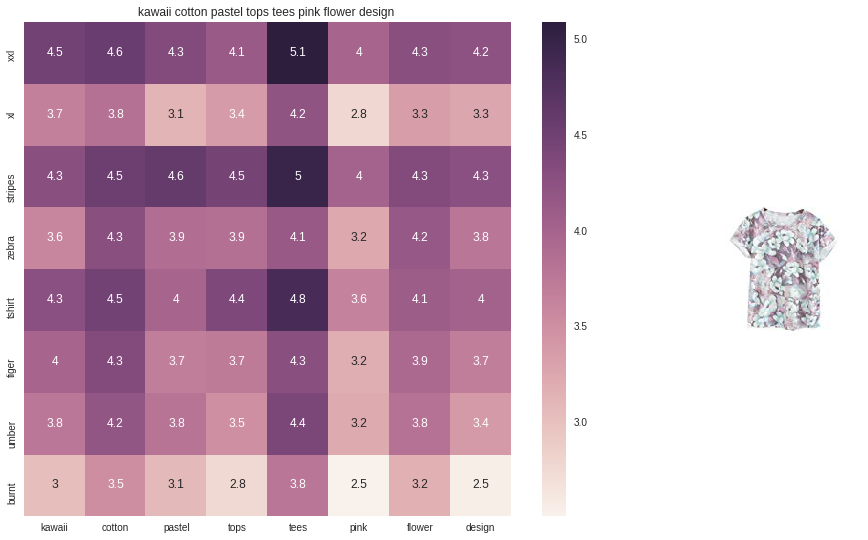

Product Title:  kawaii cotton pastel tops tees pink flower design 
Euclidean Distance from input image: 18.3155031850224
Amazon Url: www.amzon.com/dp/B071P4YKH5
https://images-na.ssl-images-amazon.com/images/I/41GM3XEv4pL._SL160_.jpg


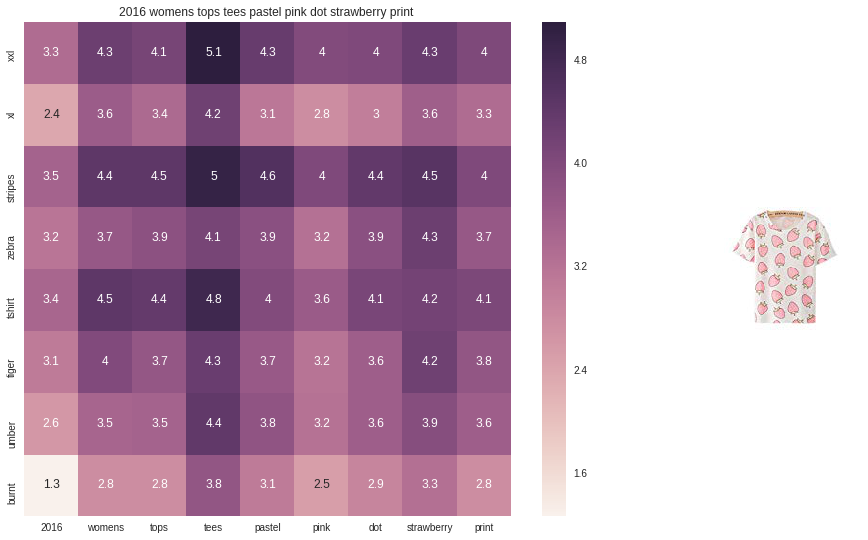

Product Title:  2016 womens tops tees pastel pink dot strawberry print 
Euclidean Distance from input image: 18.31789122704105
Amazon Url: www.amzon.com/dp/B01J434VVM


In [111]:
get_similar_products_cnn(12566,1,10,5 ,20)

https://images-na.ssl-images-amazon.com/images/I/31AfeBmGdaL._SL160_.jpg


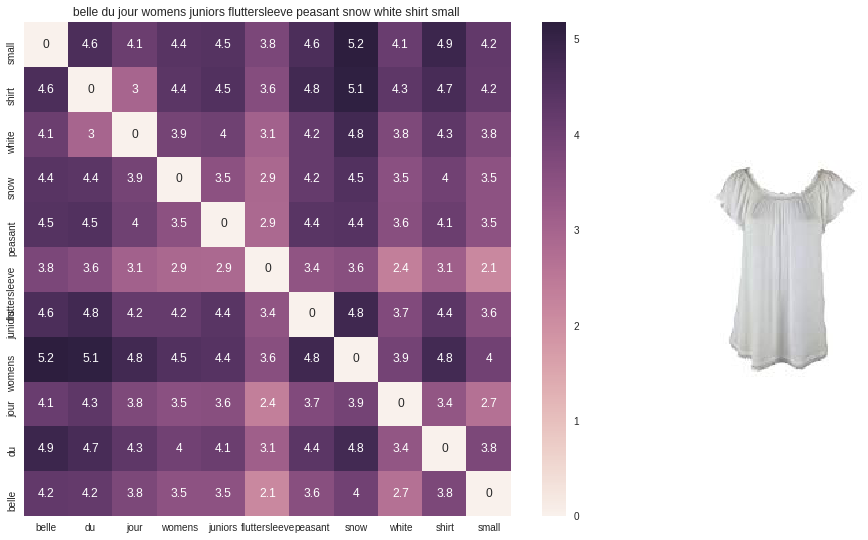

https://images-na.ssl-images-amazon.com/images/I/31qtDQUqEML._SL160_.jpg


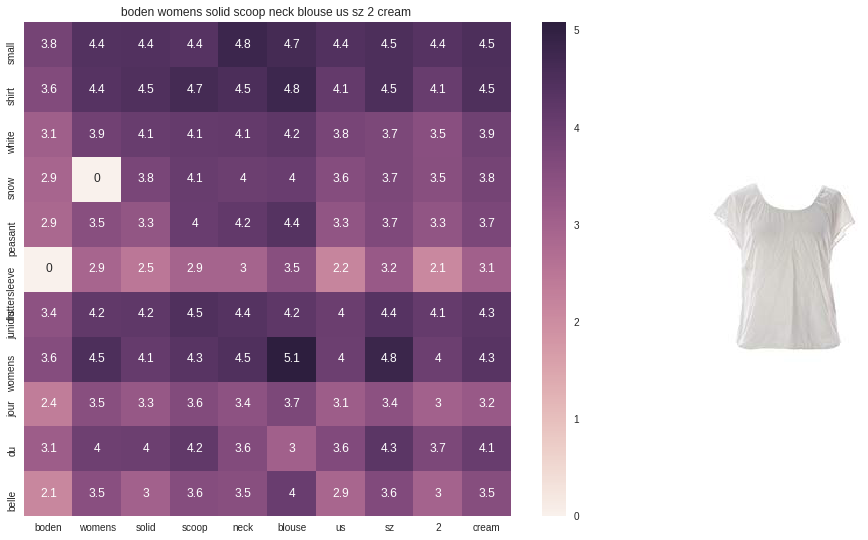

Product Title:  boden womens solid scoop neck blouse us sz 2 cream 
Euclidean Distance from input image: 12.248764989263309
Amazon Url: www.amzon.com/dp/B01H62TRVW
https://images-na.ssl-images-amazon.com/images/I/31eqxASBudL._SL160_.jpg


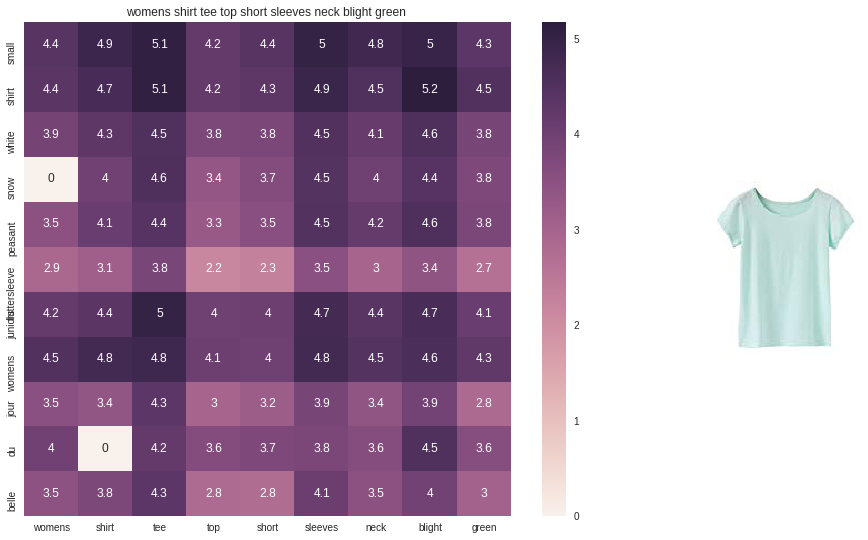

Product Title:  womens shirt tee top short sleeves neck blight green 
Euclidean Distance from input image: 12.6561103664819
Amazon Url: www.amzon.com/dp/B01EF57XT6
https://images-na.ssl-images-amazon.com/images/I/31KvXXh6OsL._SL160_.jpg


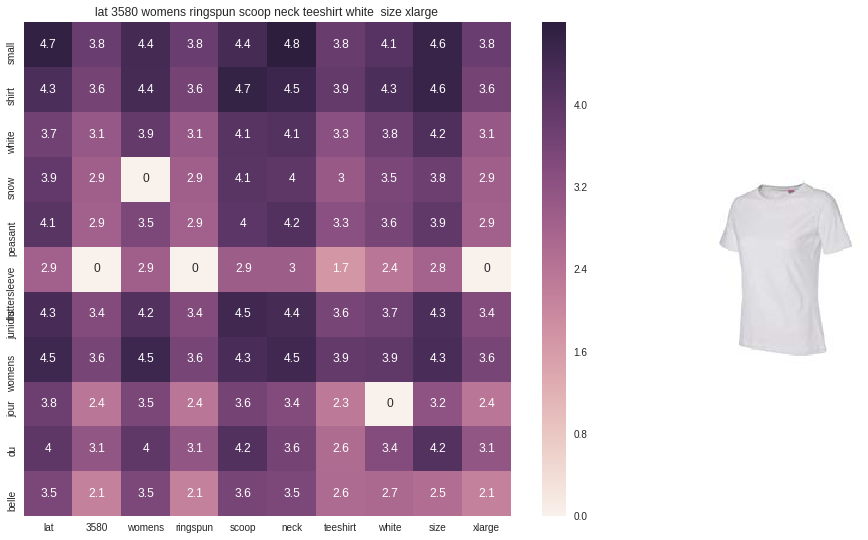

Product Title:  lat 3580 womens ringspun scoop neck teeshirt white  size xlarge 
Euclidean Distance from input image: 12.780789006708261
Amazon Url: www.amzon.com/dp/B004L6G0EO
https://images-na.ssl-images-amazon.com/images/I/414lYQBrI6L._SL160_.jpg


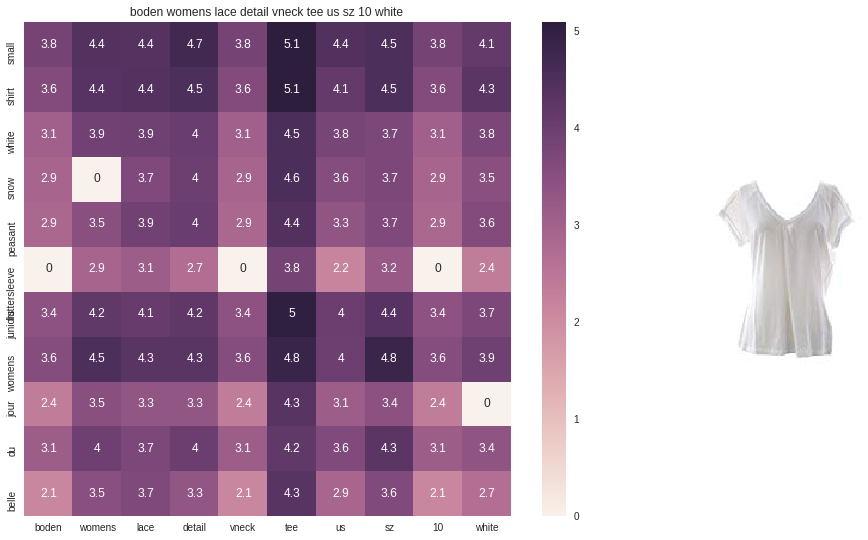

Product Title:  boden womens lace detail vneck tee us sz 10 white 
Euclidean Distance from input image: 12.800925953835218
Amazon Url: www.amzon.com/dp/B01JMB1KGK
https://images-na.ssl-images-amazon.com/images/I/31ypX6S5lYL._SL160_.jpg


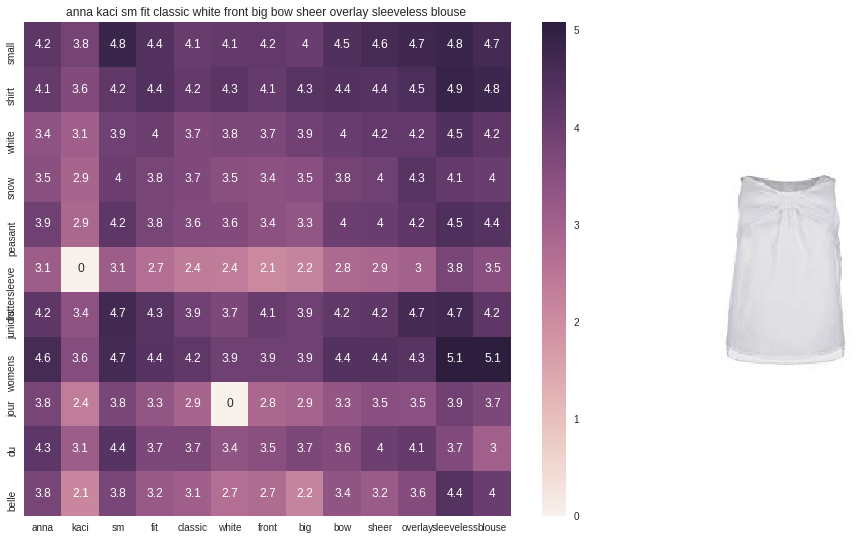

Product Title:  anna kaci sm fit classic white front big bow sheer overlay sleeveless blouse 
Euclidean Distance from input image: 12.841903860015593
Amazon Url: www.amzon.com/dp/B010EH3S02
https://images-na.ssl-images-amazon.com/images/I/31mjBXFCX9L._SL160_.jpg


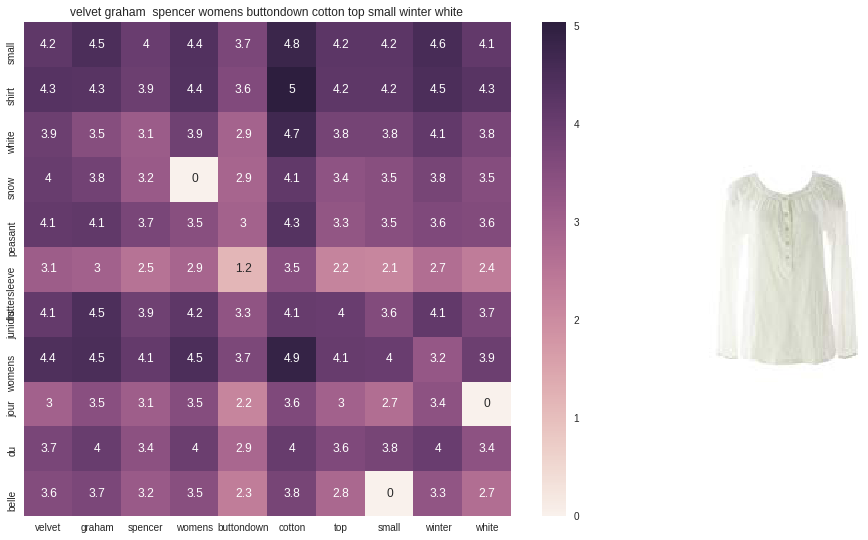

Product Title:  velvet graham  spencer womens buttondown cotton top small winter white 
Euclidean Distance from input image: 12.878370525058692
Amazon Url: www.amzon.com/dp/B01MQJ2NV8
https://images-na.ssl-images-amazon.com/images/I/41FzNpTm5gL._SL160_.jpg


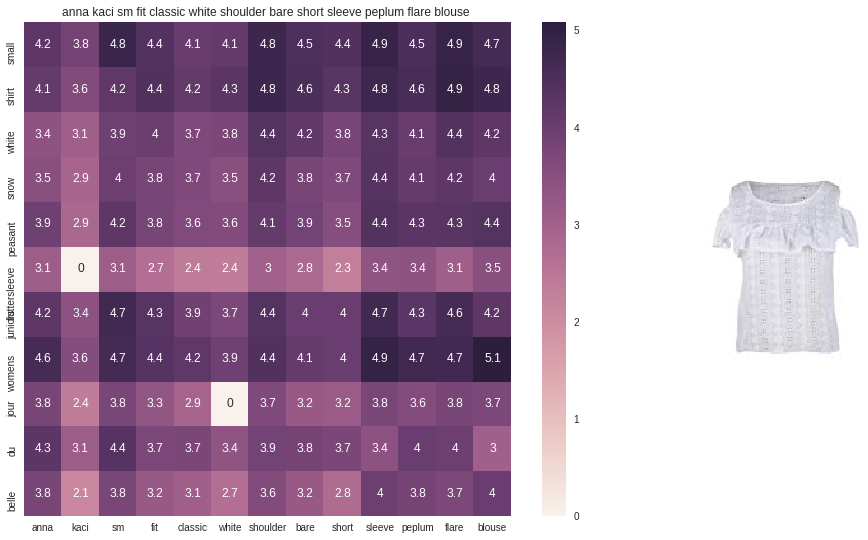

Product Title:  anna kaci sm fit classic white shoulder bare short sleeve peplum flare blouse 
Euclidean Distance from input image: 12.954235719311077
Amazon Url: www.amzon.com/dp/B010EH3B8Q
https://images-na.ssl-images-amazon.com/images/I/31doon32RHL._SL160_.jpg


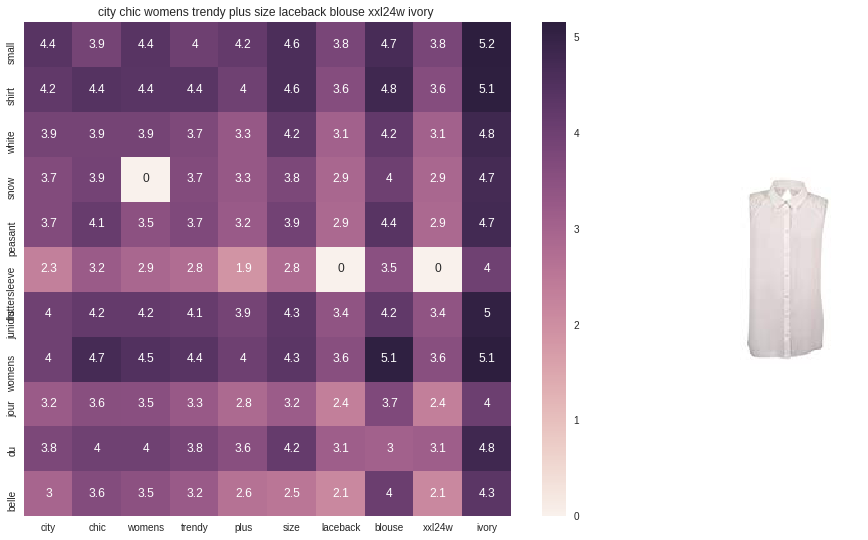

Product Title:  city chic womens trendy plus size laceback blouse xxl24w ivory 
Euclidean Distance from input image: 12.963357437241932
Amazon Url: www.amzon.com/dp/B074Q331SN
https://images-na.ssl-images-amazon.com/images/I/41J0oxwSbZL._SL160_.jpg


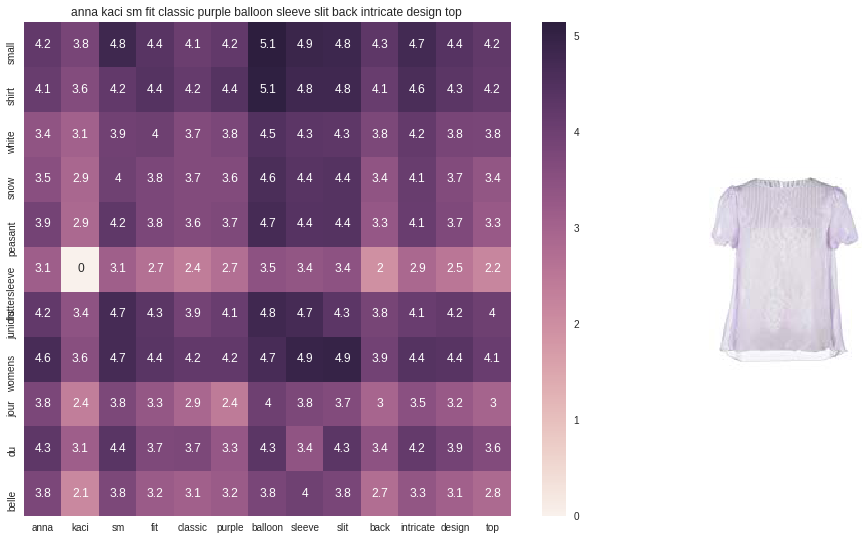

Product Title:  anna kaci sm fit classic purple balloon sleeve slit back intricate design top 
Euclidean Distance from input image: 13.011883889735067
Amazon Url: www.amzon.com/dp/B010EH3YHY
https://images-na.ssl-images-amazon.com/images/I/415OVOIPwsL._SL160_.jpg


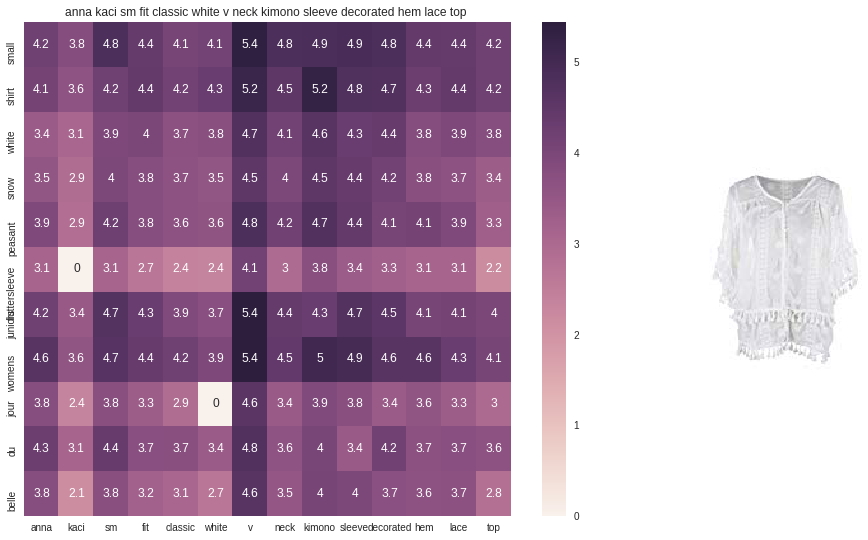

Product Title:  anna kaci sm fit classic white v neck kimono sleeve decorated hem lace top 
Euclidean Distance from input image: 13.020269636029974
Amazon Url: www.amzon.com/dp/B011WFBMBC
https://images-na.ssl-images-amazon.com/images/I/31ANOoiC-ZL._SL160_.jpg


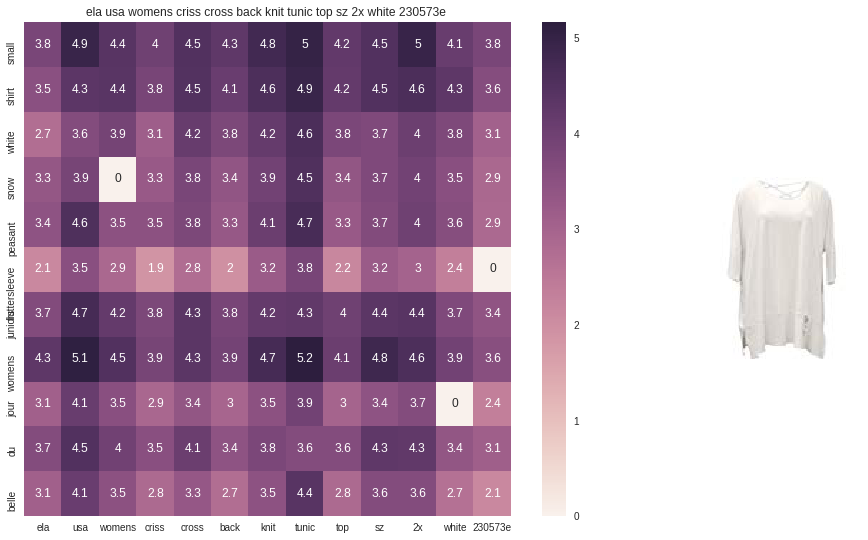

Product Title:  ela usa womens criss cross back knit tunic top sz 2x white 230573e 
Euclidean Distance from input image: 13.025055674025474
Amazon Url: www.amzon.com/dp/B01HGWKGNK
https://images-na.ssl-images-amazon.com/images/I/41THlE-54eL._SL160_.jpg


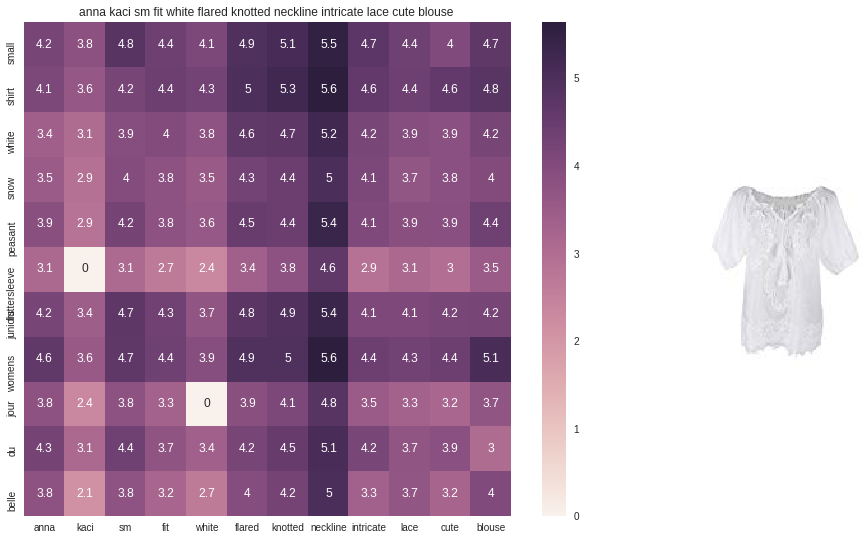

Product Title:  anna kaci sm fit white flared knotted neckline intricate lace cute blouse 
Euclidean Distance from input image: 13.02679582732264
Amazon Url: www.amzon.com/dp/B00X4UPOAE
https://images-na.ssl-images-amazon.com/images/I/310iPSeZMoL._SL160_.jpg


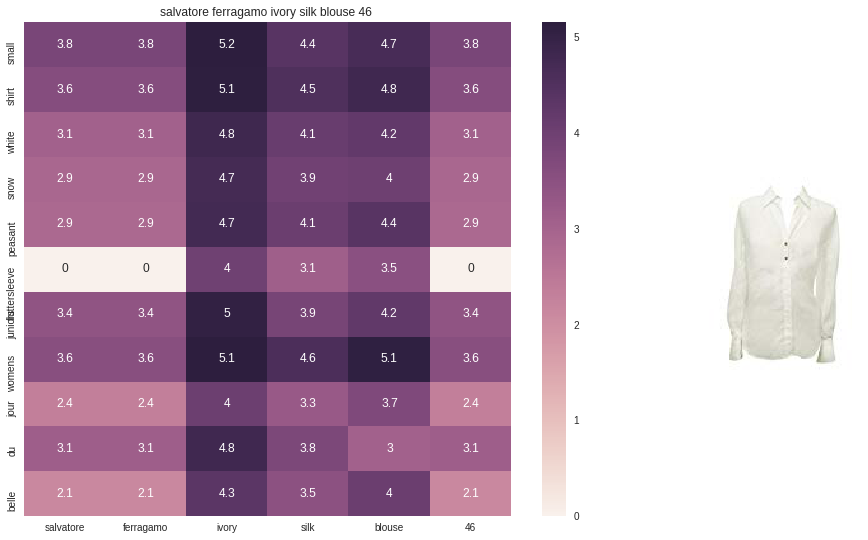

Product Title:  salvatore ferragamo ivory silk blouse 46 
Euclidean Distance from input image: 13.05659657014218
Amazon Url: www.amzon.com/dp/B0756K99NK
https://images-na.ssl-images-amazon.com/images/I/31Ndhi0uLUL._SL160_.jpg


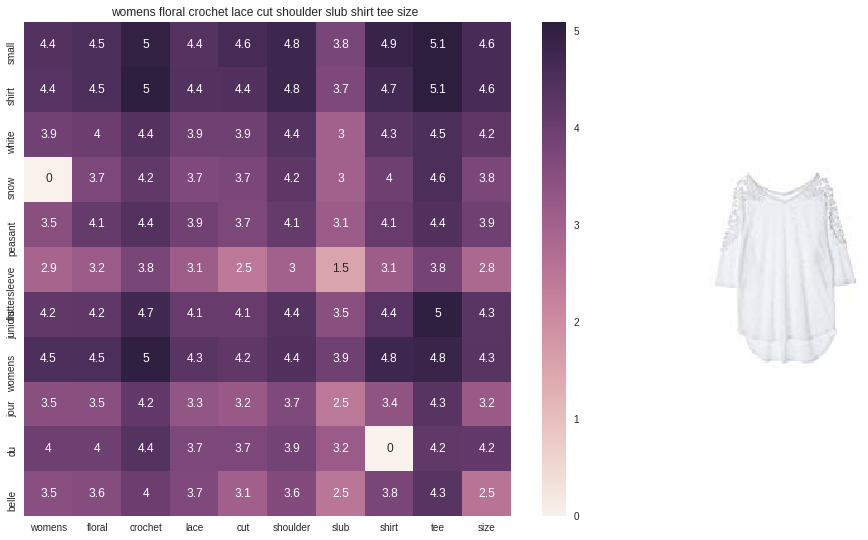

Product Title:  womens floral crochet lace cut shoulder slub shirt tee size  
Euclidean Distance from input image: 13.126507396661577
Amazon Url: www.amzon.com/dp/B00YC8PK7Y
https://images-na.ssl-images-amazon.com/images/I/318WwaG06iL._SL160_.jpg


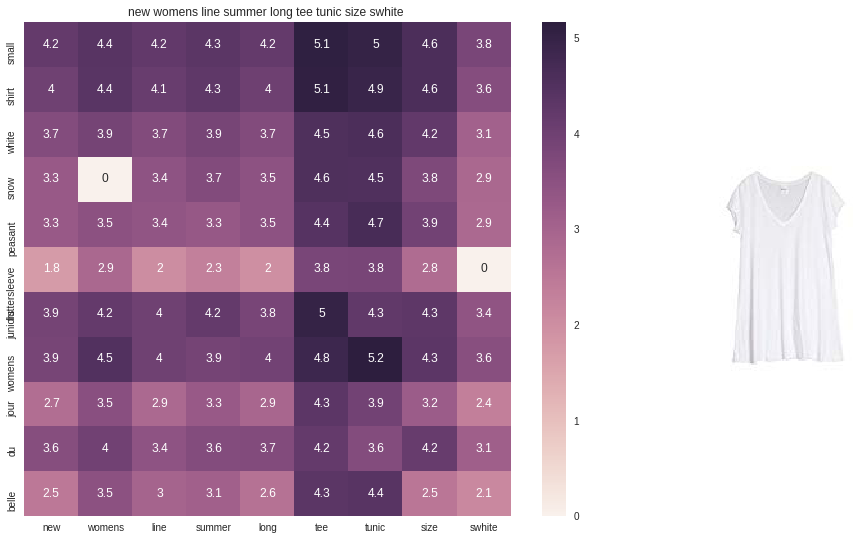

Product Title:  new womens line summer long tee tunic size swhite 
Euclidean Distance from input image: 13.126824737069027
Amazon Url: www.amzon.com/dp/B00LPDTEKI
https://images-na.ssl-images-amazon.com/images/I/31ykObdebVL._SL160_.jpg


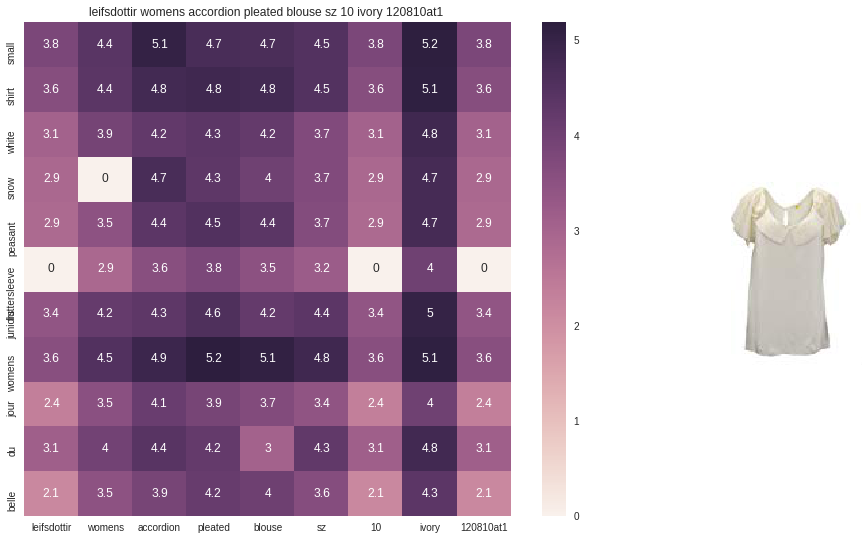

Product Title:  leifsdottir womens accordion pleated blouse sz 10 ivory 120810at1 
Euclidean Distance from input image: 13.131397205515556
Amazon Url: www.amzon.com/dp/B01B6E0DX2
https://images-na.ssl-images-amazon.com/images/I/31nxWEdk7eL._SL160_.jpg


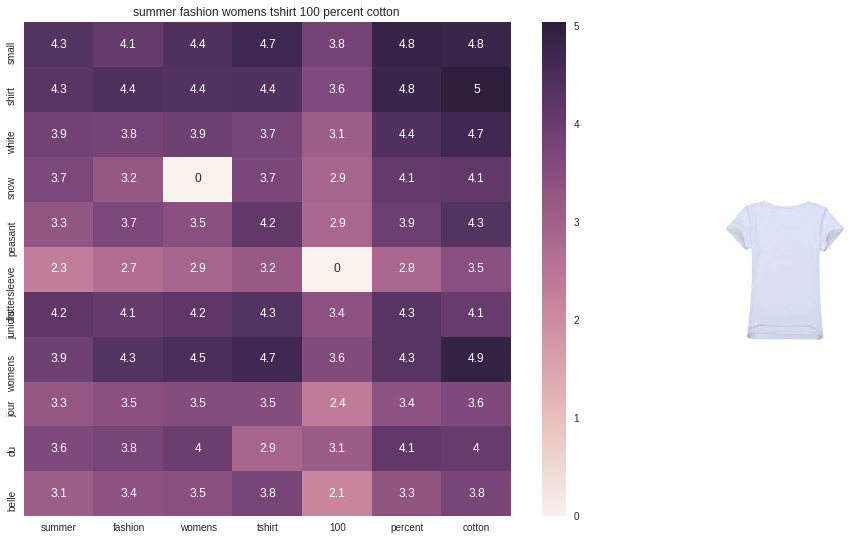

Product Title:  summer fashion womens tshirt 100 percent cotton 
Euclidean Distance from input image: 13.160970066804563
Amazon Url: www.amzon.com/dp/B074FSRHMB
https://images-na.ssl-images-amazon.com/images/I/314F7tNMyhL._SL160_.jpg


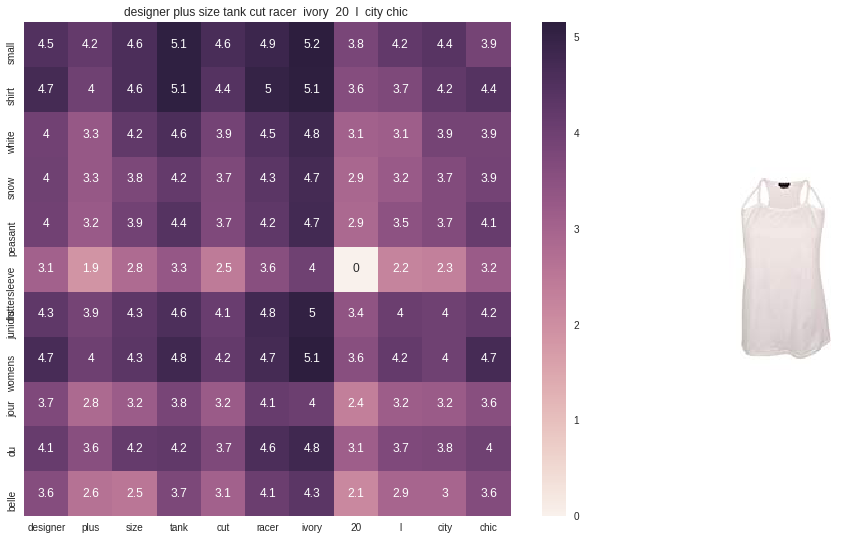

Product Title:  designer plus size tank cut racer  ivory  20  l  city chic 
Euclidean Distance from input image: 13.185824403280337
Amazon Url: www.amzon.com/dp/B01M3V2T6O
https://images-na.ssl-images-amazon.com/images/I/41R6WW693dL._SL160_.jpg


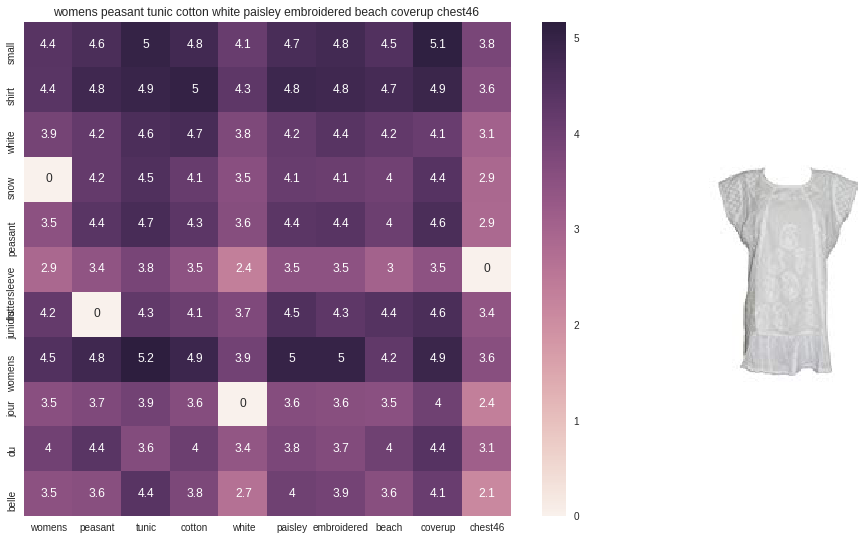

Product Title:  womens peasant tunic cotton white paisley embroidered beach coverup chest46 
Euclidean Distance from input image: 13.210253595958012
Amazon Url: www.amzon.com/dp/B06WWJFFW2


In [114]:
get_similar_products_cnn(1266,1,10,5 ,20)

https://images-na.ssl-images-amazon.com/images/I/41pPddSqxOL._SL160_.jpg


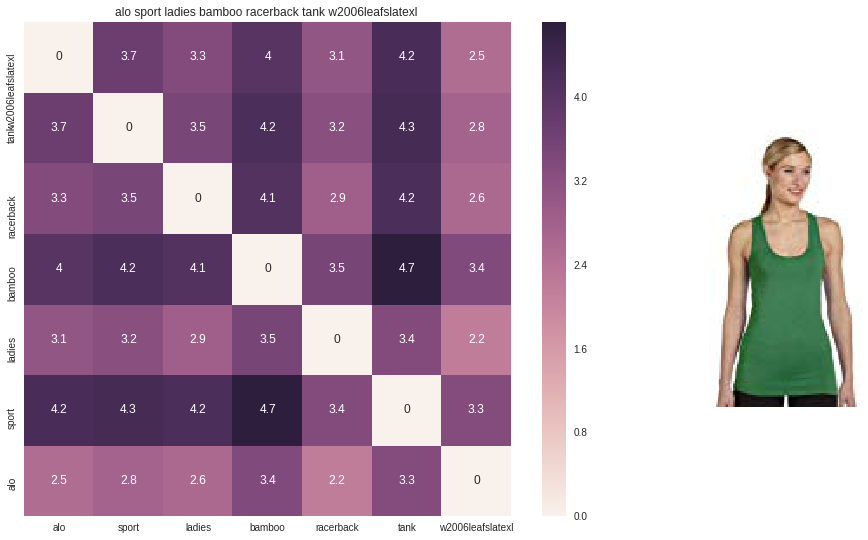

https://images-na.ssl-images-amazon.com/images/I/41pls8nxP4L._SL160_.jpg


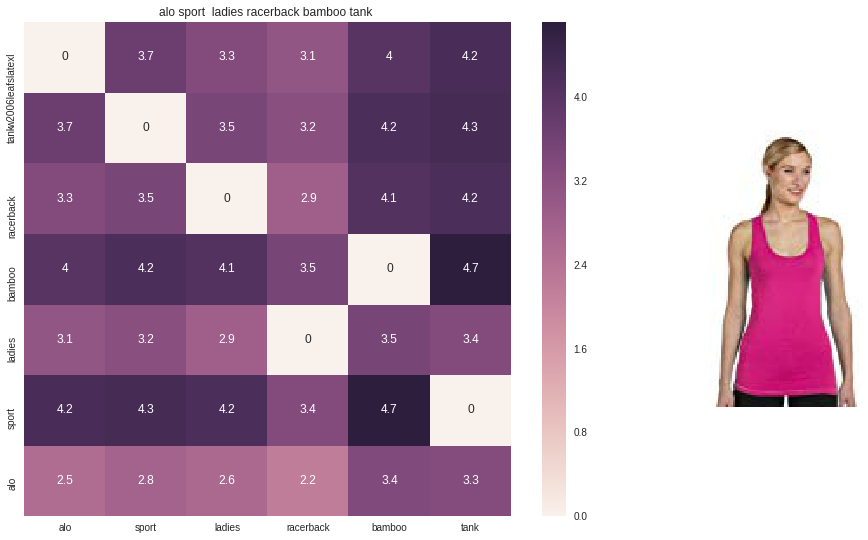

Product Title:  alo sport  ladies racerback bamboo tank 
Euclidean Distance from input image: 7.5465419241641065
Amazon Url: www.amzon.com/dp/B003IWOLYS
https://images-na.ssl-images-amazon.com/images/I/415EXHCVOlL._SL160_.jpg


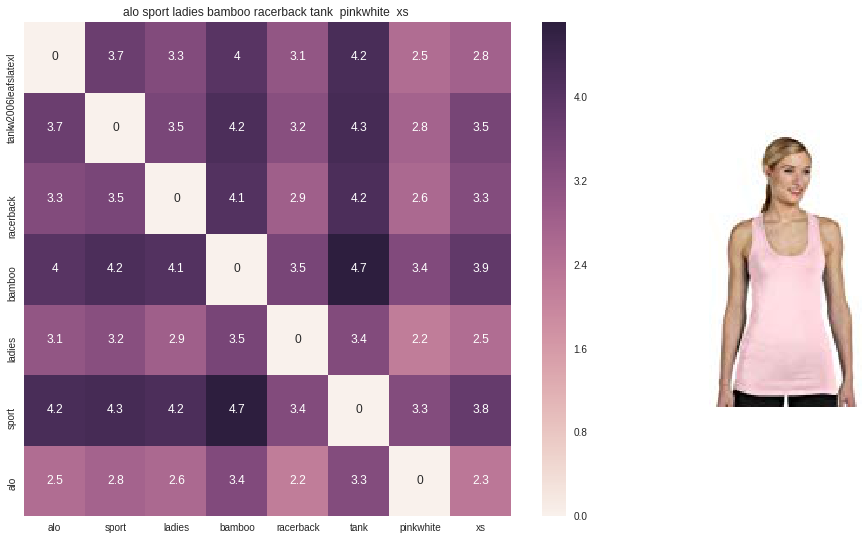

Product Title:  alo sport ladies bamboo racerback tank  pinkwhite  xs 
Euclidean Distance from input image: 9.737407837985808
Amazon Url: www.amzon.com/dp/B004J8LKP8
https://images-na.ssl-images-amazon.com/images/I/41t4Bpw%2BjoL._SL160_.jpg


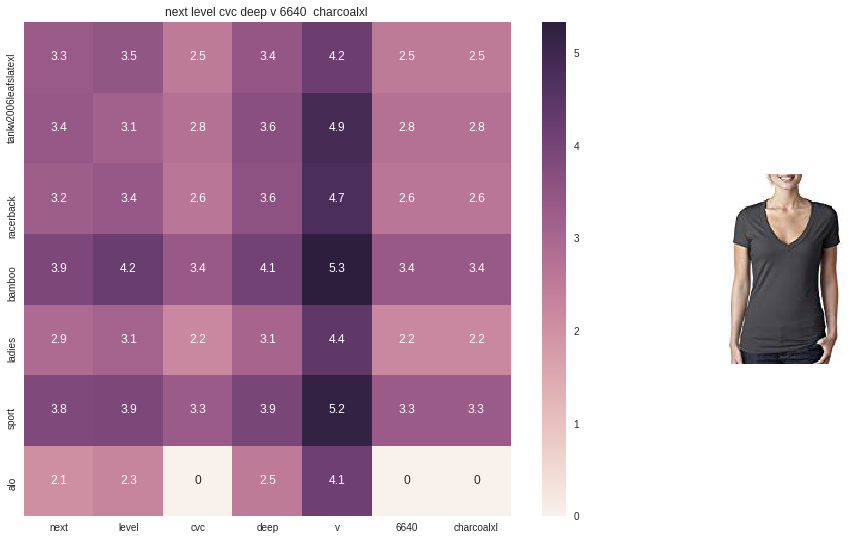

Product Title:  next level cvc deep v 6640  charcoalxl 
Euclidean Distance from input image: 15.000133514404297
Amazon Url: www.amzon.com/dp/B008LT2J3S
https://images-na.ssl-images-amazon.com/images/I/41l%2Bl1ELqGL._SL160_.jpg


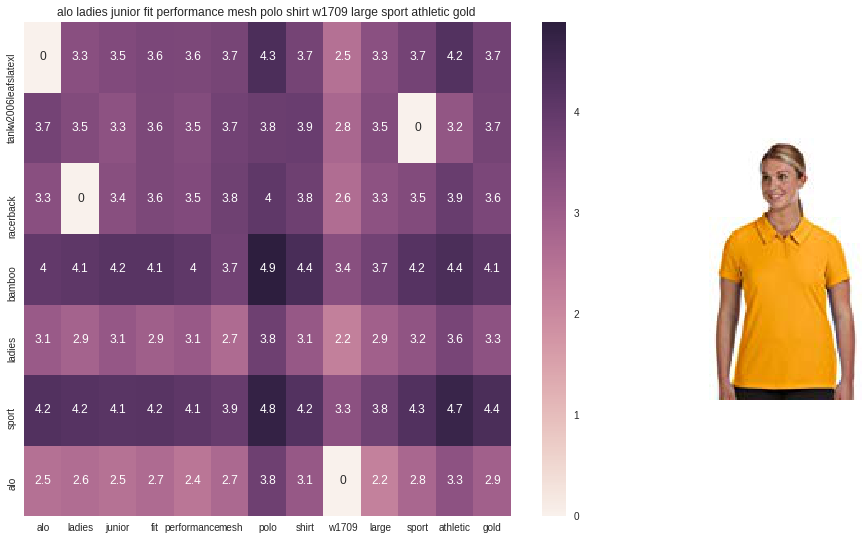

Product Title:  alo ladies junior fit performance mesh polo shirt w1709 large sport athletic gold 
Euclidean Distance from input image: 15.345650507517341
Amazon Url: www.amzon.com/dp/B00PH3DJC6
https://images-na.ssl-images-amazon.com/images/I/41LtptobePL._SL160_.jpg


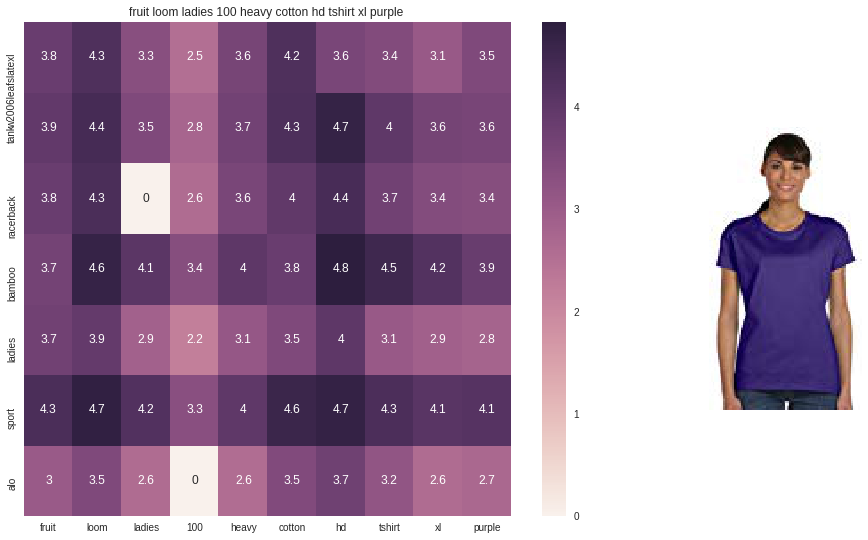

Product Title:  fruit loom ladies 100 heavy cotton hd tshirt xl purple 
Euclidean Distance from input image: 15.435049133402133
Amazon Url: www.amzon.com/dp/B014WBV6E6
https://images-na.ssl-images-amazon.com/images/I/31xMuDaDxBL._SL160_.jpg


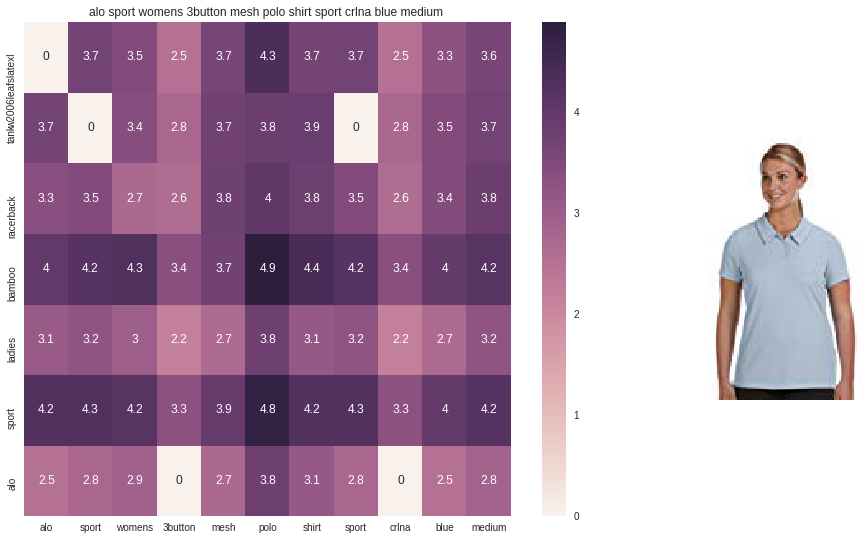

Product Title:  alo sport womens 3button mesh polo shirt sport crlna blue medium 
Euclidean Distance from input image: 15.804975258174348
Amazon Url: www.amzon.com/dp/B00IM7XQ40
https://images-na.ssl-images-amazon.com/images/I/41GH7DtJx8L._SL160_.jpg


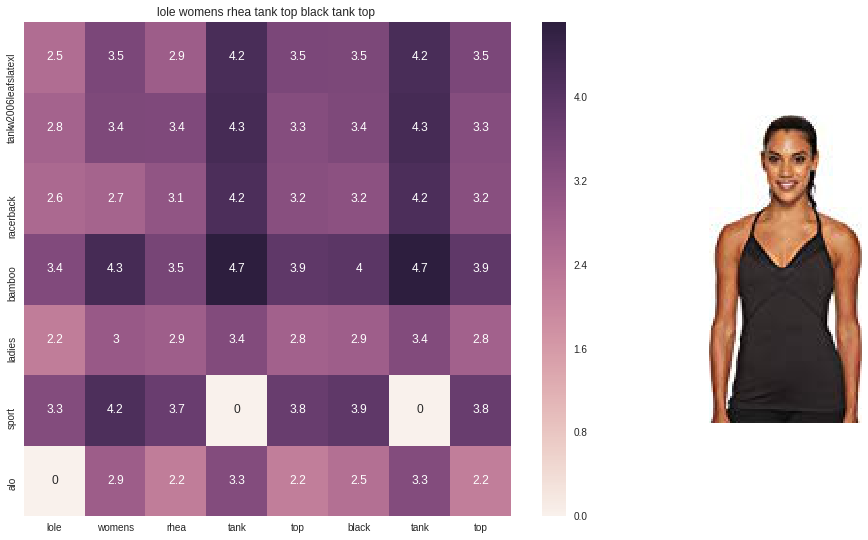

Product Title:  lole womens rhea tank top black tank top 
Euclidean Distance from input image: 15.961480590044605
Amazon Url: www.amzon.com/dp/B01N4ATA6H
https://images-na.ssl-images-amazon.com/images/I/3112FpV77lL._SL160_.jpg


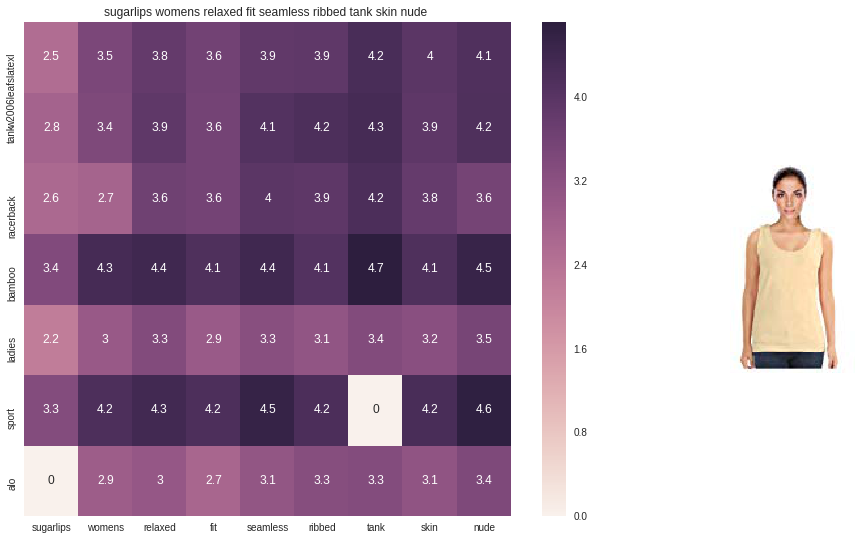

Product Title:  sugarlips womens relaxed fit seamless ribbed tank skin nude 
Euclidean Distance from input image: 15.990584574040739
Amazon Url: www.amzon.com/dp/B00IJHSY54
https://images-na.ssl-images-amazon.com/images/I/41yQh3mp7jL._SL160_.jpg


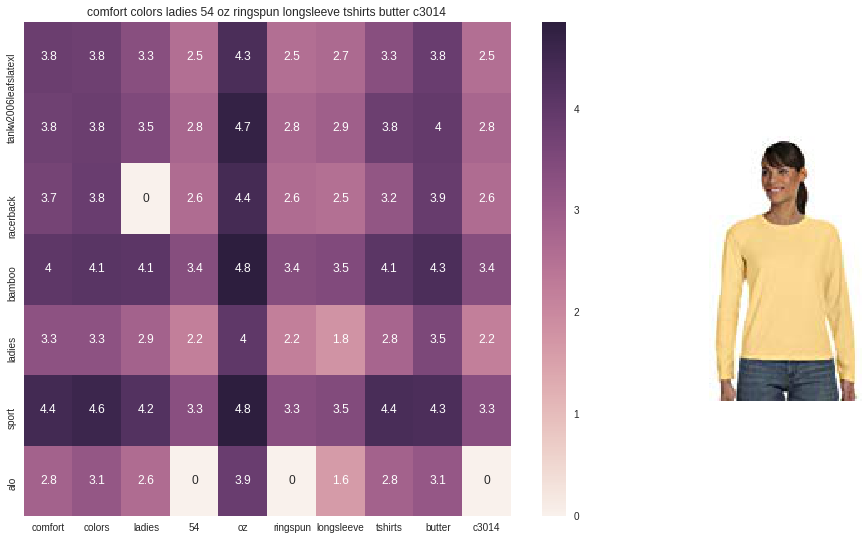

Product Title:  comfort colors ladies 54 oz ringspun longsleeve tshirts butter c3014 
Euclidean Distance from input image: 16.158441575882172
Amazon Url: www.amzon.com/dp/B00390D6FY
https://images-na.ssl-images-amazon.com/images/I/31-eZgaDYIL._SL160_.jpg


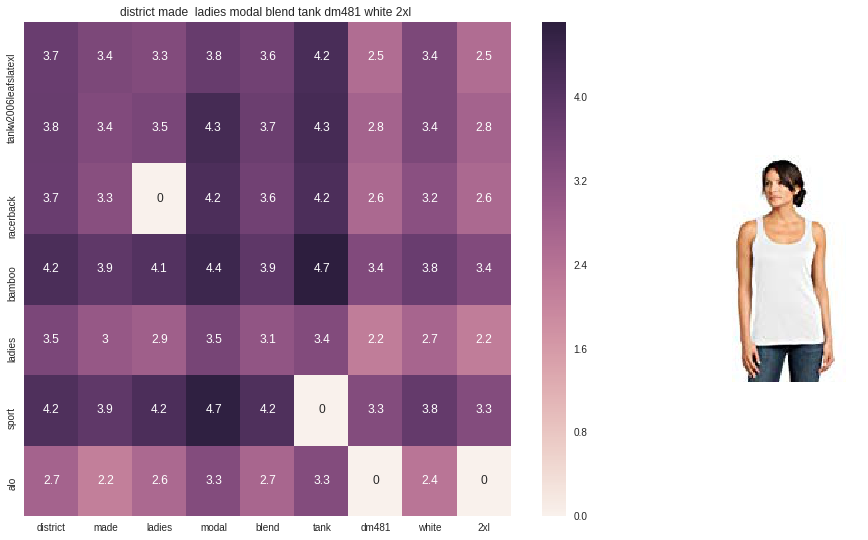

Product Title:  district made  ladies modal blend tank dm481 white 2xl 
Euclidean Distance from input image: 16.33480728682455
Amazon Url: www.amzon.com/dp/B00KC6OZQC
https://images-na.ssl-images-amazon.com/images/I/41RPheaUv3L._SL160_.jpg


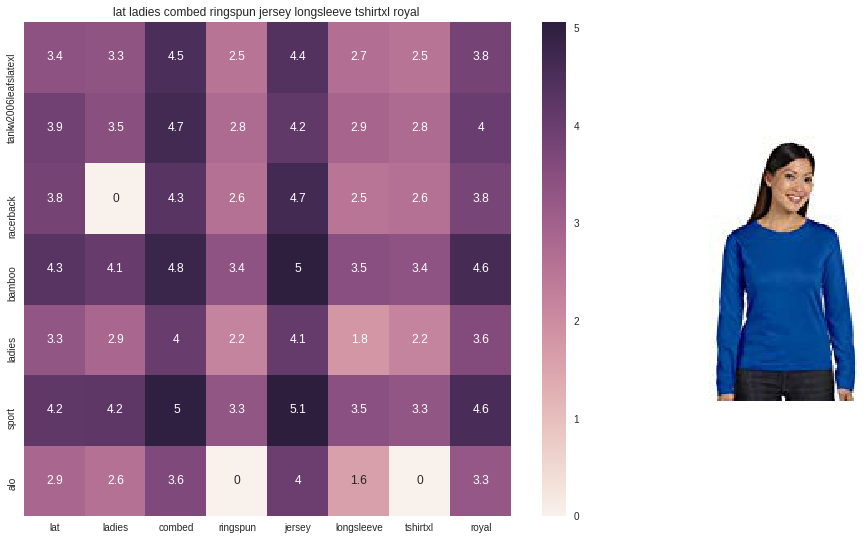

Product Title:  lat ladies combed ringspun jersey longsleeve tshirtxl royal 
Euclidean Distance from input image: 16.344288652488974
Amazon Url: www.amzon.com/dp/B00L8A70AE
https://images-na.ssl-images-amazon.com/images/I/41R9qUbcJqL._SL160_.jpg


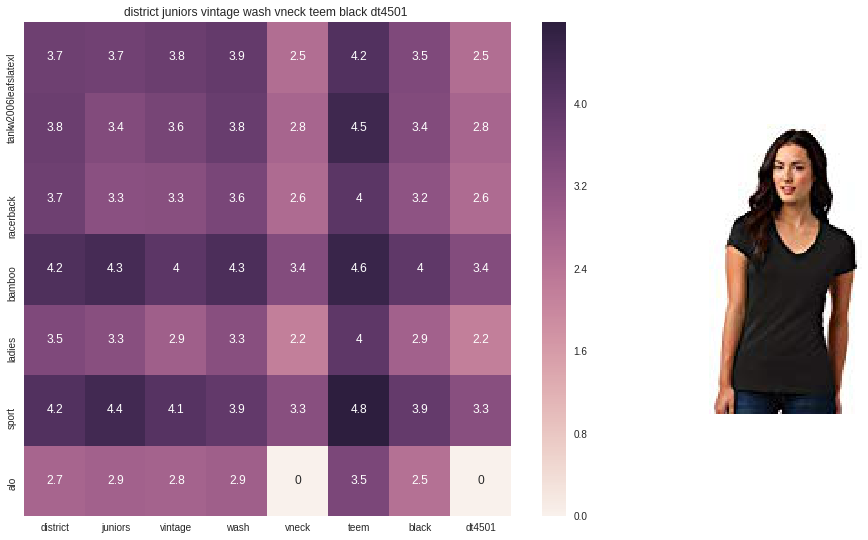

Product Title:  district juniors vintage wash vneck teem black dt4501 
Euclidean Distance from input image: 16.363957917791094
Amazon Url: www.amzon.com/dp/B00TSNTQI2
https://images-na.ssl-images-amazon.com/images/I/41wGzC8hwEL._SL160_.jpg


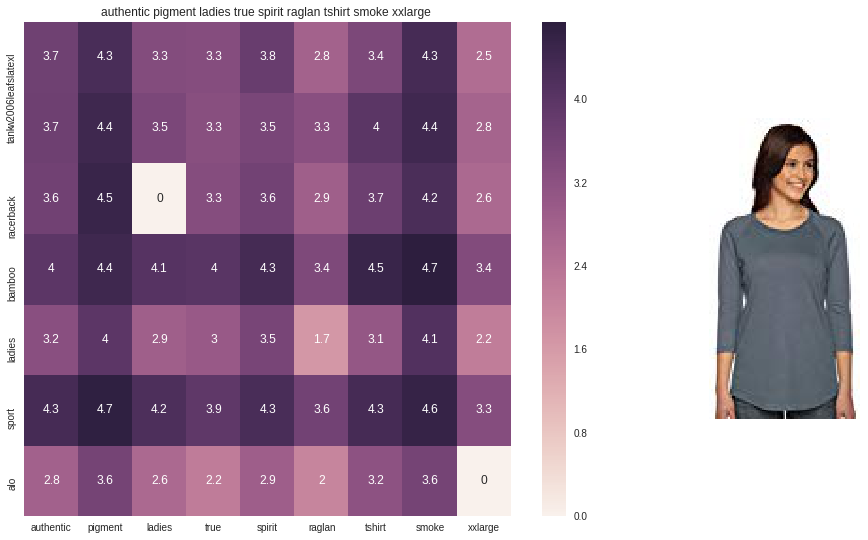

Product Title:  authentic pigment ladies true spirit raglan tshirt smoke xxlarge 
Euclidean Distance from input image: 16.377009030327066
Amazon Url: www.amzon.com/dp/B01GESXYTU
https://images-na.ssl-images-amazon.com/images/I/41VNiKTyDrL._SL160_.jpg


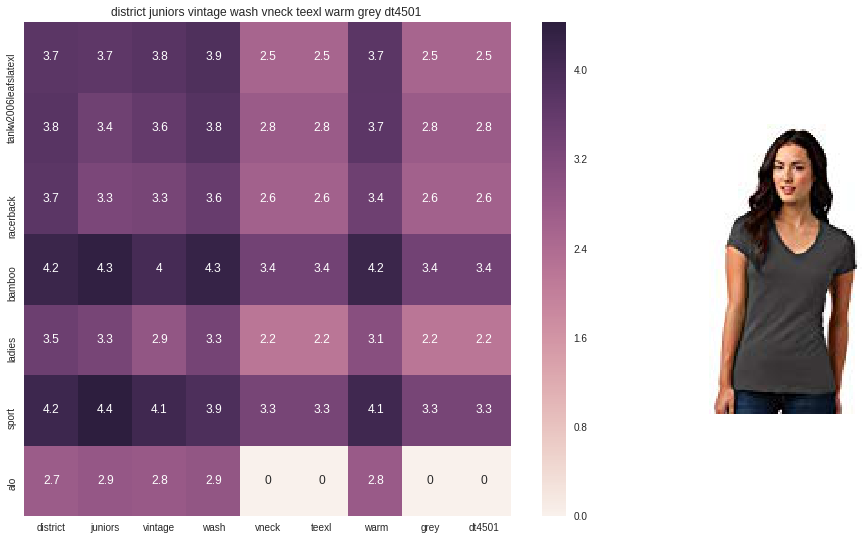

Product Title:  district juniors vintage wash vneck teexl warm grey dt4501 
Euclidean Distance from input image: 16.42007160194894
Amazon Url: www.amzon.com/dp/B00TSNY902
https://images-na.ssl-images-amazon.com/images/I/41msjSDI42L._SL160_.jpg


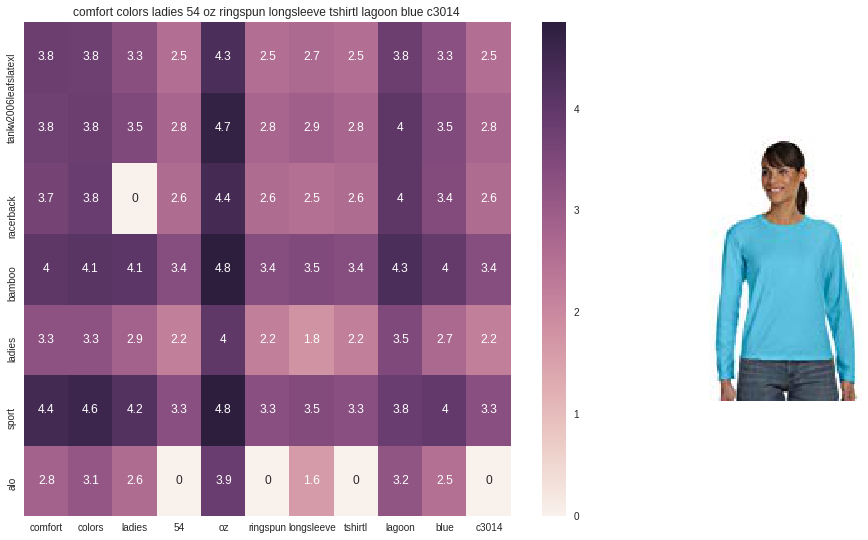

Product Title:  comfort colors ladies 54 oz ringspun longsleeve tshirtl lagoon blue c3014 
Euclidean Distance from input image: 16.48112752614859
Amazon Url: www.amzon.com/dp/B00390KELS
https://images-na.ssl-images-amazon.com/images/I/41RPheaUv3L._SL160_.jpg


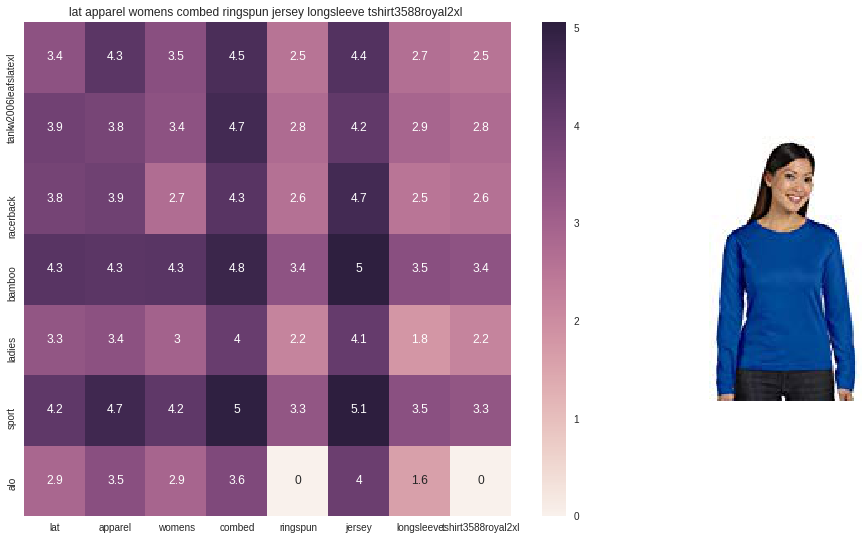

Product Title:  lat apparel womens combed ringspun jersey longsleeve tshirt3588royal2xl 
Euclidean Distance from input image: 16.485501384099663
Amazon Url: www.amzon.com/dp/B019MT215Q
https://images-na.ssl-images-amazon.com/images/I/41Dv-q3m5qL._SL160_.jpg


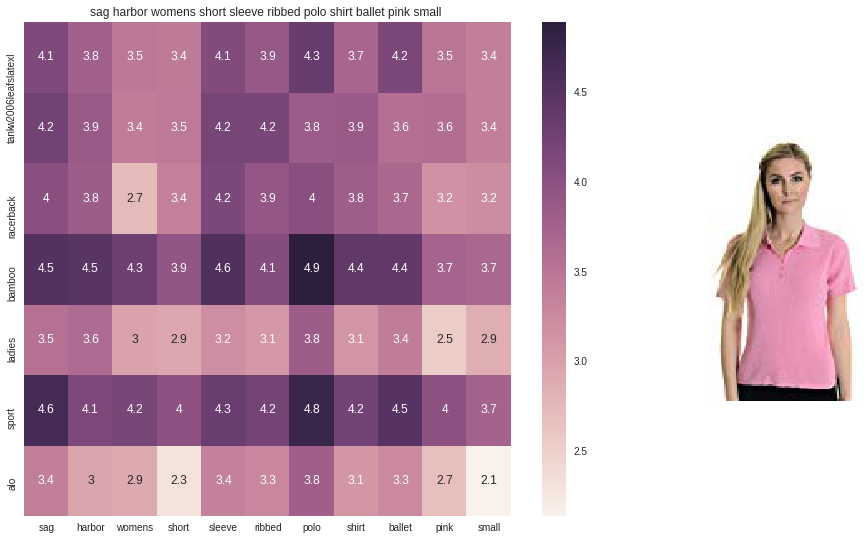

Product Title:  sag harbor womens short sleeve ribbed polo shirt ballet pink small 
Euclidean Distance from input image: 16.52623713492463
Amazon Url: www.amzon.com/dp/B071CZMDB4
https://images-na.ssl-images-amazon.com/images/I/41msjSDI42L._SL160_.jpg


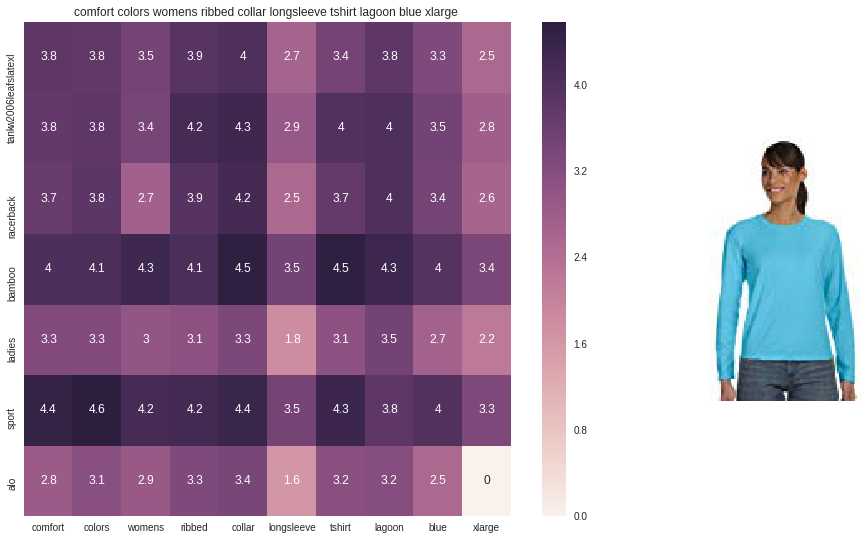

Product Title:  comfort colors womens ribbed collar longsleeve tshirt lagoon blue xlarge 
Euclidean Distance from input image: 16.542148705813176
Amazon Url: www.amzon.com/dp/B00390IRLM
https://images-na.ssl-images-amazon.com/images/I/41ieTQXKE9L._SL160_.jpg


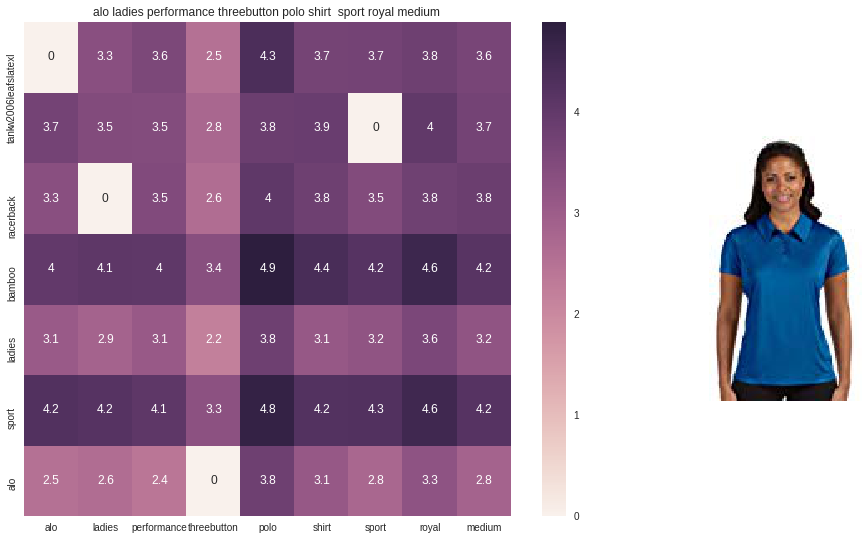

Product Title:  alo ladies performance threebutton polo shirt  sport royal medium 
Euclidean Distance from input image: 16.546501230026365
Amazon Url: www.amzon.com/dp/B01GESYBOM


In [115]:
get_similar_products_cnn(500,1,10,5 ,20)

<h1>Report</h1>

<h2>Procedure</h2>
Product recommondation to users based on  amazon's API data 

Claeaning the data and removing   near duplicate items using the words in the text for each item

Featurizing data using BagOfWords, Tfidf, Idf and computing Pairwise simalirities

Using Text Semantics (Word to vec, Tfidf Word to vec, Idf Word to vec ) based product similarity

Using More Features Such as Color, Brand, Type along with BOW,TFIDF,IDF and Text Semantics to out Pairwise simalirities

Vectorizing the image using(CNN) with bottleneck features of pretrained VGG-16

Finally using IDF,  Color, Brand, Image Vector computing Pairwise Weightedsimalirities

